## **Capstone Project 2: Customer Relationship Management Analysis of Gamma**

**JCDS 0406 011 - Muhamad Shidqi**

# Background Statement

Gamma is software as a service (SaaS) company based at United State of America who selling software for other companies (B2B) and delivered it to customer via Amazon Web Service (AWS) platform. Gamma offer software as innovative solution that fit for some industries.

After four years of operation Gamma have a good financial performance, this indicate from profit that Gamma make from 2020 to 2023. Based on that condition, Board of Gamma think this is the right time to have Gamma Customer Relation Management Program who called GCRM.

Purpose of GCRM are intended to improve customer-company connections by effectively understanding, managing, and utilizing customer interactions. Gamma want to increase customer satisfaction by providing specialized services, increase loyalty by responding of particular desires, increase revenue by finding opportunities or streamline operations, and provide a deeper understanding of clients through data analysis. GCRM in the final phases want develops better and more lasting relationships between Gamma and their customers by prioritizing customer demands and experiences.

Board decide first phase of GCRM implementation are have branchs office in several countries **outside USA** as representative council of Gamma. The branch will consist of Account Manager who will be assigned to assist Gamma Customers.

The account manager will be responsible for building and maintaining relationships with customers. Their tasks include identifying customer needs, delivering right product as a solution to customer issues, contract negotiation, and ensuring customer satisfaction and retention. They may also collaborate with various internal teams to ensure timely and quality service to customers.

## Problem Statement
As first phase implementation of GCRM, company want to know **most effective segment for company**, **which location that suit for the branch** , and **what the most needed product at that location**. This information will help Gamma to form account manager team and choose location for the branch.

From the explanation above, we conclude some questions:

1. What's the segment that should be proritize to have an Account Manager?

2. Where is the right locations for the **Gamma Branch Office**?

3. What is the most needed product at the branch location?

As a **data analyst**, we will try to answer the question above.



## Objective
Our objective are:

1. Examine the most effective segment for **Gamma**.

2. Examine ideal locations for **Gamma Branch Office**.

2. Examine the most required products in the each recommended location.

# Data
To achive our objective, let's analyze Gamma Sales Dataset that provide by company. The dataset can be access here : 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.graph_objects import Figure

In [2]:
source = pd.read_csv('Gamma-Sales.csv')
source

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


## Data Understanding and Cleaning
Before we go to analysis, we should known our dataset condition to have better data understanding. From this stage, we will know anomalies that exist inside our dataset and we need take care that anomalies in data wrangling and cleaning process. All things that we have done with these anomalies will be have explanations from domain knowledge or statistic wise. 

First, we let's see general information about this dataset.

| **No** | **Column Name** |                                   **Description**                                  | **Data Type** |
|:------:|:---------------:|:----------------------------------------------------------------------------------:|:-------------:|
|      1 | Row ID          | A unique identifier for each transaction.                                          |     Object    |
|      2 | Order ID        | A unique identifier for each order.                                                |     Object    |
|      3 | Order Date      | The date when order was placed                                                     |   Date Time   |
|      4 | Year            | A numerical representation of the order date. (Year)                               |    Integer    |
|      5 | Contact Name    | The name of person who placed the order.                                           |     Object    |
|      6 | Country         | The country where the order was placed.                                            |     Object    |
|      7 | City            | The city where the order was placed.                                               |     Object    |
|      8 | Continent       | The continent where the order was placed.                                          |     Object    |
|      9 | Region          | The region where the order was placed.                                          |     Object    |
|     10 | Customer        | The name of company that placed the order.                                         |     Object    |
|     11 | Customer ID     | A unique identifier for each customer.                                             |     Object    |
|     12 | Industry        | The industry the customer belongs to.                                              |     Object    |
|     13 | Segment         | The customer segment (SMB, Strategic, and Enterprise)                              |     Object    |
|     14 | Product         | The product was ordered.                                                           |     Object    |
|     15 | License         | The license key for every product. Unique for every product from every transaction |     Object    |
|     16 | Sales           | The total sales amount for the transaction in hundred USD.                         |     Float     |
|     17 | Quantity        | The total number of items in the tranwaction. Minimum value is 1.                  |    Integer    |
|     18 | Discount        | The discount applied to the tranwaction between range 0.0 to 1.0                   |     Float     |
|     19 | Profit          | The profit from transaction in hundred USD.                                        |     Float     |

In [3]:
print(f'Total data and columns in Saas Sales dataset is {source.shape[0]} rows and {source.shape[1]} columns.')
source.info()

Total data and columns in Saas Sales dataset is 9994 rows and 19 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 1

In [4]:
display(source.describe(), source.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


### Data Type
From information above we known some columns have inappropriate data type, these columns need to change their data type:

Order Date should be a ***datetime*** not ***object***;

Date Key should become **Year**;
    
Customer ID should be a ***object*** not ***integer***; and

Row ID should become **index**.

In [5]:
#Change Customer ID
source['Customer ID'] = source['Customer ID'].astype(object)

#Change Order Date
source['Order Date'] = source['Order Date'].astype('datetime64[ns]')

#Change Value of Date Key become Year
source['Date Key'] = source['Order Date'].dt.year.astype('object')
#Rename Date Key become Year
source = source.rename(columns={'Date Key':'Year', 'Region' : 'Continent', 'Subregion':'Region'})

#Multiply Sales and Profit with 100
source['Sales'] = source['Sales']*100
source['Profit'] = source['Profit']*100

#Delete Row ID Column
source.drop('Row ID', axis=1, inplace=True)

#Sort by Order ID
source.sort_values(by='Order ID', inplace=True)
source.reset_index(inplace=True)
#Delete Index Column
source.drop('index', axis=1, inplace=True)

display(source.describe(), source.describe(include='object'), source)

,Sales,Quantity,Discount,Profit
count,9.994000e+03,9994.000000,9994.000000,9994.000000
mean,2.298580e+04,3.789574,0.156203,2865.689631
std,6.232451e+04,2.225110,0.206452,23426.010769
min,4.440000e+01,1.000000,0.000000,-659997.800000
25%,1.728000e+03,2.000000,0.000000,172.875000
50%,5.449000e+03,3.000000,0.200000,866.650000
75%,2.099400e+04,5.000000,0.200000,2936.400000
max,2.263848e+06,14.000000,0.800000,839997.600000


,Order ID,Year,Contact Name,Country,City,Continent,Region,Customer,Customer ID,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,48,262,3,12,99,99,10,3,14,9994
top,EMEA-2023-100111,2023,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,1080,Finance,SMB,ContactMatcher,AVBMH39MTD
freq,14,3319,37,2001,922,4219,2507,192,192,2127,5191,1842,1


,Order ID,Order Date,Year,Contact Name,Country,City,Continent,Region,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,19670.4,6,0.2,6884.64
1,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,50248.8,3,0.2,-8793.54
2,AMER-2020-100279,2020-03-10,2020,Luke Davidson,Brazil,São Paulo,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,Support,NI5MITNJ98,2238.0,2,0.0,1074.24
3,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,0O2MCUTMFW,236.8,2,0.2,82.88
4,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,1900.8,3,0.2,689.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2023-169929,2023-09-26,2023,Rose Ball,Netherlands,The Hague,EMEA,EU-WEST,Target,1085,Retail,Strategic,Marketing Suite - Gold,QWY39JAWLQ,3990.0,5,0.0,1037.40
9990,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,1075,Consumer Products,SMB,ContactMatcher,72ZYHWG94C,1437.6,3,0.2,485.19
9991,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EMEA,UKIR,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,X8PDHRO4CY,27176.4,2,0.1,4831.36
9992,EMEA-2023-169999,2023-06-20,2023,Melanie Young,United Kingdom,London,EMEA,UKIR,Daimler,1052,Transportation,Strategic,ContactMatcher,5JIPT0BG1B,1156.8,3,0.2,375.96


In [6]:
#Recheck data type
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order ID      9994 non-null   object        
 1   Order Date    9994 non-null   datetime64[ns]
 2   Year          9994 non-null   object        
 3   Contact Name  9994 non-null   object        
 4   Country       9994 non-null   object        
 5   City          9994 non-null   object        
 6   Continent     9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Customer      9994 non-null   object        
 9   Customer ID   9994 non-null   object        
 10  Industry      9994 non-null   object        
 11  Segment       9994 non-null   object        
 12  Product       9994 non-null   object        
 13  License       9994 non-null   object        
 14  Sales         9994 non-null   float64       
 15  Quantity      9994 non-null   int64   

### Check Missing and Duplicate Values

#### Check Duplicate

In [7]:
#Check Duplicate Data
print(f'Duplicated data found : {source.duplicated().sum()}')
if(source.duplicated().sum() == 0):
    print("No duplicate data was found in this dataset.")
else:
    print("Duplicate data was found in the dataset. We should look further this duplicate.")

Duplicated data found : 0
No duplicate data was found in this dataset.


#### Check Null Values

In [8]:
#Check Null Values
source.isnull().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Continent       0
Region          0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No null data was found in our dataset.

#### Check NaN Values

In [9]:
#Check NaN Values
source.isna().sum()

Order ID        0
Order Date      0
Year            0
Contact Name    0
Country         0
City            0
Continent       0
Region          0
Customer        0
Customer ID     0
Industry        0
Segment         0
Product         0
License         0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

No missing data was found in our dataset

### Unique value from every columns in AWS SaaS Dataset

In [10]:
pd.set_option('display.max_colwidth', None)
list_unique = []
for x in source.columns:
    if(x == 'Order Date'):
        list_unique.append([x, source[x].nunique(), source[x].apply(lambda x : x.date()).unique()])
    else:
        list_unique.append([x, source[x].nunique(), source[x].unique()])
unique_value = pd.DataFrame(data=list_unique,
                            columns=['Column Name', 'Number of Unique', 'Unique Value'])
unique_value

,Column Name,Number of Unique,Unique Value
0,Order ID,5009,"[AMER-2020-100090, AMER-2020-100279, AMER-2020-100363, AMER-2020-100762, AMER-2020-100860, AMER-2020-100867, AMER-2020-101175, AMER-2020-101392, AMER-2020-101462, AMER-2020-101560, AMER-2020-101931, AMER-2020-102071, AMER-2020-102085, AMER-2020-102295, AMER-2020-102330, AMER-2020-102652, AMER-2020-103310, AMER-2020-103338, AMER-2020-103373, AMER-2020-103401, AMER-2020-103660, AMER-2020-103702, AMER-2020-103940, AMER-2020-104178, AMER-2020-104269, AMER-2020-104563, AMER-2020-104780, AMER-2020-104808, AMER-2020-104976, AMER-2020-105137, AMER-2020-105172, AMER-2020-105249, AMER-2020-105270, AMER-2020-105648, AMER-2020-105984, AMER-2020-106264, AMER-2020-106334, AMER-2020-106376, AMER-2020-106439, AMER-2020-106572, AMER-2020-106726, AMER-2020-107139, AMER-2020-107181, AMER-2020-107398, AMER-2020-107594, AMER-2020-107699, AMER-2020-107755, AMER-2020-107818, AMER-2020-108189, AMER-2020-108609, AMER-2020-108861, AMER-2020-108903, AMER-2020-109036, AMER-2020-109134, AMER-2020-109218, AMER-2020-109232, AMER-2020-109302, AMER-2020-109456, AMER-2020-109890, AMER-2020-109897, AMER-2020-109918, AMER-2020-110072, AMER-2020-110184, AMER-2020-110527, AMER-2020-110674, AMER-2020-110786, AMER-2020-110849, AMER-2020-111003, AMER-2020-111059, AMER-2020-111192, AMER-2020-111360, AMER-2020-111857, AMER-2020-111871, AMER-2020-111962, AMER-2020-112291, AMER-2020-112795, AMER-2020-112837, AMER-2020-112851, AMER-2020-113047, AMER-2020-113271, AMER-2020-113320, AMER-2020-113383, AMER-2020-113579, AMER-2020-113768, AMER-2020-114125, AMER-2020-114195, AMER-2020-114433, AMER-2020-114643, AMER-2020-115056, AMER-2020-115133, AMER-2020-115161, AMER-2020-115259, AMER-2020-115357, AMER-2020-115812, AMER-2020-115889, AMER-2020-115973, AMER-2020-116239, AMER-2020-116673, AMER-2020-116785, AMER-2020-116834, ...]"
1,Order Date,1237,"[2020-07-08, 2020-03-10, 2020-04-08, 2020-11-24, 2020-03-26, 2020-10-19, 2020-12-09, 2020-12-07, 2020-04-20, 2020-11-28, 2020-10-28, 2020-05-09, 2020-10-04, 2020-12-29, 2020-04-06, 2020-05-10, 2020-03-11, 2020-05-18, 2020-11-21, 2020-08-25, 2020-09-12, 2020-09-17, 2020-03-01, 2020-03-07, 2020-05-21, 2020-02-05, 2020-10-10, 2020-04-04, 2020-11-11, 2020-03-03, 2020-12-26, 2020-12-27, 2020-12-05, 2020-10-31, 2020-09-05, 2020-12-06, 2020-07-05, 2020-07-02, 2020-05-19, 2020-02-08, 2020-09-08, 2020-10-02, 2020-05-28, 2020-10-03, 2020-12-20, 2020-11-05, 2020-06-30, 2020-01-14, 2020-08-12, 2020-10-16, 2020-07-21, 2020-09-07, 2020-10-22, 2020-07-12, 2020-08-09, 2020-02-13, 2020-04-18, 2020-06-01, 2020-02-04, 2020-07-30, 2020-04-23, 2020-03-18, 2020-09-29, 2020-04-03, 2020-08-23, 2020-09-11, 2020-10-24, 2020-07-09, 2020-12-12, 2020-09-10, 2020-12-13, 2020-05-13, 2020-11-01, 2020-06-13, 2020-05-02, 2020-09-26, 2020-02-01, 2020-08-06, 2020-06-09, 2020-11-02, 2020-03-04, 2020-12-15, 2020-04-26, 2020-10-11, 2020-01-28, 2020-03-28, 2020-07-22, 2020-05-04, 2020-08-05, 2020-07-23, 2020-11-16, 2020-11-03, 2020-04-15, 2020-03-23, 2020-09-27, 2020-11-10, 2020-05-06, 2020-08-19, 2020-02-15, 2020-10-15, ...]"
2,Year,4,"[2020, 2021, 2022, 2023]"
3,Contact Name,793,"[Hannah Sanderson, Luke Davidson, Frank Ball, Ella Simpson, Faith Campbell, Kevin Rampling, Ella King, Maria Edmunds, Irene Johnston, Anthony Mackay, Olivia Graham, Charles Churchill, Joanne Hemmings, Adam Nash, Emma Greene, Samantha Ince, Una Mackay, Connor Paige, Michelle McLean, Donna Scott, Blake Short, Joe Davies, Robert Dyer, Joseph Newman, Anthony Sanderson, Stewart Vance, David McDonald, Charles Ross, Andrea Reid, Jan Baker, Ryan Kerr, Stephen Dyer, Jonathan Gibson, Pippa Edmunds, Carolyn Ross, Caroline Burgess, Leah Clarkson, Jennifer Dowd, Cameron King, Claire Carr, Rose Dyer, Audrey Young, Sam Parsons, Grace Butler, Theresa Henderson, Sophie Lewis, Andrew Miller, Dominic Short, Colin Glover, Kimberly Newman, Audrey Bower, Peter Hart, Bernadette Hill, Karen Howard, Dominic Duncan, Sonia Miller, Gavin Nash, Lisa Oliver, Bella Hodg

#### Check Invalid Category Members

##### Location Category

In [11]:
#Continent
pd.set_option('display.max_colwidth', None)
list_Continent = []
for x in source['Continent'].unique():
    list_Continent.append([x, source[source['Continent'] == x]['Region'].nunique(), source[source['Continent'] == x]['Region'].unique()])
unique_Continent = pd.DataFrame(data=list_Continent,
                            columns=['Continent', 'Number of Region', 'Region'])
unique_Continent

,Continent,Number of Region,Region
0,AMER,2,"[NAMER, LATAM]"
1,APJ,4,"[JAPN, ANZ, IND, APAC]"
2,EMEA,6,"[UKIR, EU-WEST, NOR, MEA, EU-EAST, EU]"


In [12]:
#Region from EMEA Continent
list_country_emea = []
for x in source[source['Continent'] == 'EMEA']['Region'].unique():
    list_country_emea.append([x, source[source['Region'] == x]['Country'].nunique(), source[source['Region'] == x]['Country'].unique()])
unique_country_emea = pd.DataFrame(data=list_country_emea,
                            columns=['Region', 'Number of Country', 'Country'])
unique_country_emea

,Region,Number of Country,Country
0,UKIR,2,"[United Kingdom, Ireland]"
1,EU-WEST,13,"[Germany, Spain, France, Poland, Netherlands, Luxembourg, Belgium, Portugal, Croatia, Denmark, Austria, Slovenia, Iceland]"
2,NOR,3,"[Finland, Sweden, Norway]"
3,MEA,6,"[Turkey, South Africa, United Arab Emirates, Saudi Arabia, Egypt, Qatar]"
4,EU-EAST,5,"[Israel, Ukraine, Russia, Greece, Czech Republic]"
5,EU,1,[Italy]


The EMEA Continent category has some inaccuracies.
*   The EMEA Continent should be Europe (EU).
*   The MEA Region should be included in the Asia Continent as Western Asia (WA). In the MEA Region, there are also countries like Egypt and South Africa, which should be part of the African Continent, while is not included yet in this data.
*   Turkey should be in the Eastern Europe (EU-East) Region.
*   Furthermore, there is an error in the EU Region, which only includes Italy. Italy should be in the SOR Region.
*   Additionally, there are inaccuracies in some countries in the EU-West Region. Denmark and Iceland should be in the NOR region. While, Croatia and Slovenia should be in the EU-East region. And, UKIR Region should be in EU-West Region.

In [13]:
#Region from APJ Continent
list_country_apj = []
for x in source[source['Continent'] == 'APJ']['Region'].unique():
    list_country_apj.append([x, source[source['Region'] == x]['Country'].nunique(), source[source['Region'] == x]['Country'].unique()])
unique_country_apj = pd.DataFrame(data=list_country_apj,
                            columns=['Region', 'Number of Country', 'Country'])
unique_country_apj

,Region,Number of Country,Country
0,JAPN,1,[Japan]
1,ANZ,2,"[Australia, New Zealand]"
2,IND,1,[India]
3,APAC,6,"[Philippines, South Korea, Indonesia, Singapore, Taiwan, China]"


The APJ Continent category has some inaccurasies.

* The JAPN Region should be included in the East Asia (EA) region.

* In the APAC Region, China, Taiwan, and South Korea should be in the East Asia (EA) region. The APAC Region should actually be Southeast Asia (SEA).

*   The IND region should be South Asia (SA), even though it currently only has one country, India.

*   Based on the previous explanations, there is also a West Asia (WA) Region that was previously classified under Europe.

* Furthermore, considering the members of the APJ Continent, it would be more appropriate to call this Continent Asia-Pacific (APAC).

In [14]:
#Region from AMER Continent
list_country_amer = []
for x in source[source['Continent'] == 'AMER']['Region'].unique():
    list_country_amer.append([x, source[source['Region'] == x]['Country'].nunique(), source[source['Region'] == x]['Country'].unique()])
unique_country_amer = pd.DataFrame(data=list_country_amer,
                            columns=['Region', 'Number of Country', 'Country'])
unique_country_amer

,Region,Number of Country,Country
0,NAMER,2,"[United States, Canada]"
1,LATAM,6,"[Brazil, Chile, Colombia, Mexico, Argentina, Costa Rica]"


In America Continent (AMER), there are only a few inaccuracies. 

*   Mexico and Costa Rica should be in the NOMER Continent.

In [15]:
#Let's make some Region adjustment based on country location
mapping_Region = {
    'Denmark' : 'NOR',
    'Iceland' : 'NOR',
    'Croatia' : 'EU-EAST',
    'Slovenia' : 'EU-EAST',
    'Turkey' : 'SOR',
    'Portugal' : 'SOR',
    'Spain' : 'SOR',
    'Greece' : 'SOR',
    'Italy' : 'SOR',
    'United Kingdom' : 'EU-WEST',
    'Ireland' : 'EU-WEST',
    'Qatar' : 'WA',
    'Saudi Arabia' : 'WA',
    'United Arab Emirates' : 'WA',
    'Israel' : 'WA',
    'Japan' : 'EA',
    'China' : 'EA',
    'Taiwan' : 'EA',
    'South Korea' : 'EA',
    'Indonesia' : 'SEA',
    'Philippines' : 'SEA',
    'Singapore' : 'SEA',
    'India' : 'SA',
    'Costa Rica' : 'NAMER',
    'Mexico' : 'NAMER',
    'Egypt' : 'NAf',
    'South Africa' : 'SSA'
}
source['Region'] = np.where(source['Country'].isin(mapping_Region.keys()), source['Country'].map(mapping_Region), source['Region'])

In [16]:
#Let's make some Continent adjustment based on Region
mapping_Continent = {
    'NAf' : 'AFR',
    'SSA' : 'AFR',
    'WA' : 'APJ'
}
source['Continent'] = np.where(source['Region'].isin(mapping_Continent.keys()), source['Region'].map(mapping_Continent), source['Continent'])

In [17]:
#Region for Africa (AFR) Continent
list_country_afr = []
for x in source[source['Continent'] == 'AFR']['Region'].unique():
    list_country_afr.append([x, source[source['Region'] == x]['Country'].nunique(), source[source['Region'] == x]['Country'].unique()])
unique_afr = pd.DataFrame(data = list_country_afr,
                          columns = ['Region', 'Number of Country', 'Country'])
unique_afr

,Region,Number of Country,Country
0,SSA,1,[South Africa]
1,NAf,1,[Egypt]


After the adjustment, the African Continent is now included in our dataset.

In [18]:
#Let's rename our Continent
source['Continent'].replace({'EMEA' : 'EU', 'APJ' : 'APAC'}, inplace=True)

In [19]:
#Country from Europe (EU) Region
list_city_eu = []
for x in source[source['Continent'] == 'EU']['Country'].unique():
    list_city_eu.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_eu = pd.DataFrame(data=list_city_eu,
                            columns=['Country', 'Number of City', 'City'])
unique_city_eu

,Country,Number of City,City
0,United Kingdom,14,"[London, Leicester, Edinburgh, Leeds, Manchester, Liverpool, Birmingham, Belfast, Brighton, Newcastle, Bristol, Glasgow, Woking, Cardiff]"
1,Germany,11,"[Berlin, Hamburg, Leipzig, Frankfurt, Stuttgart, Munich, Cologne, Mannheim, Hanover, Nuremberg, Dresden]"
2,Spain,8,"[Seville, Granada, Barcelona, Alicante, Madrid, Valencia, Murcia, Zaragoza]"
3,Finland,4,"[Helsinki, Vantaa, Espoo, Tampere]"
4,Turkey,4,"[Istanbul, Ankara, Izmir, Bursa]"
5,France,5,"[Paris, Nice, Lyon, Marseille, Nantes]"
6,Ireland,3,"[Dublin, Cork, Limerick]"
7,Sweden,4,"[Stockholm, Uppsala, Gothenburg, Malmö]"
8,Ukraine,4,"[Odessa, Kyiv, Donetsk, Kharkiv]"
9,Italy,12,"[Naples, Catania, Milan, Venice, Genoa, Florence, Rome, Turin, Bari, Palermo, Bologna, Brescia]"


In [20]:
#Country from Asia-Pacific (APAC) Region
list_city_apac = []
for x in source[source['Continent'] == 'APAC']['Country'].unique():
    list_city_apac.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_apac = pd.DataFrame(data=list_city_apac,
                            columns=['Country', 'Number of City', 'City'])
unique_city_apac

,Country,Number of City,City
0,Japan,13,"[Tokyo, Shizuoka, Kanagawa, Saitama, Osaka, Chiba, Hyogo, Hiroshima, Sapporo, Aichi, Kyoto, Fukuoka, Ibaraki]"
1,Australia,10,"[Sydney, Melbourne, Brisbane, Gold Coast, Hobart, Wollongong, Perth, Geelong, Adelaide, Canberra]"
2,New Zealand,2,"[Auckland, Wellington]"
3,India,6,"[Delhi, Hyderabad, Bangalore, Mumbai, Kolkata, Chennai]"
4,Philippines,3,"[Quezon City, Davao City, Manila]"
5,South Korea,5,"[Seoul, Incheon, Gwangju, Daegu, Busan]"
6,Indonesia,3,"[Bandung, Jakarta, Surabaya]"
7,Singapore,1,[Singapore]
8,Taiwan,1,[Taipei]
9,China,7,"[Beijing, Shenzhen, Shanghai, Guangzhou, Tianjin, Suzhou, Chengdu]"


In [21]:
#Country from America (AMER) Region
list_city_amer = []
for x in source[source['Continent'] == 'AMER']['Country'].unique():
    list_city_amer.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_amer = pd.DataFrame(data=list_city_amer,
                            columns=['Country', 'Number of City', 'City'])
unique_city_amer

,Country,Number of City,City
0,United States,68,"[Los Angeles, Phoenix, Burlington, Raleigh, New York City, Houston, Detroit, Chicago, Aurora, Seattle, Virginia Beach, Rochester, Columbus, Denver, Newark, San Diego, Yonkers, Tucson, Lakewood, Austin, Minneapolis, Buffalo, Jacksonville, Fort Worth, Philadelphia, Memphis, San Francisco, Miami, Wilmington, Henderson, Jackson, Las Vegas, Baltimore, Anaheim, Lakeland, Richmond, Springfield, Milwaukee, Huntsville, Providence, San Antonio, Indianapolis, Nashville, Roswell, Atlanta, Fresno, Charlotte, San Jose, Franklin, Tampa, Arlington, Everett, Tulsa, Columbia, Alexandria, Long Beach, Tallahassee, Louisville, Oklahoma City, Lawrence, Omaha, Lafayette, Dallas, Cleveland, Oakland, Sacramento, Clinton, Lancaster]"
1,Brazil,6,"[São Paulo, Rio de Janeiro, Brasília, Belo Horizonte, Salvador, Manaus]"
2,Chile,3,"[Santiago, Antofagasta, Puente Alto]"
3,Canada,10,"[Toronto, Vancouver, Calgary, Quebec, Montreal, Regina, Hamilton, Ottawa, Winnipeg, Victoria]"
4,Colombia,3,"[Bogotá, Cali, Medellín]"
5,Mexico,8,"[Tijuana, Mexico City, Guadalajara, Monterrey, Toluca, Cancun, Cabo San Lucas, Puerto Vallarta]"
6,Argentina,4,"[Rosario, Buenos Aires, Mendoza, Córdoba]"
7,Costa Rica,1,[San José]


In [22]:
#Country from Africa (AFR) Region
list_city_afr = []
for x in source[source['Continent'] == 'AFR']['Country'].unique():
    list_city_afr.append([x, source[source['Country'] == x]['City'].nunique(), source[source['Country'] == x]['City'].unique()])
unique_city_afr = pd.DataFrame(data = list_city_afr,
                               columns = ['Country', 'Number of City', 'City'])
unique_city_afr

,Country,Number of City,City
0,South Africa,2,"[Cape Town, Johannesburg]"
1,Egypt,1,[Cairo]


Now the classification of **Continents, Regions, and Countries** is correct.

#### Customer Category

In [23]:
#Let's Check out Customer Information
# pd.set_option('display.max_row', None)
list_customer = []
for x in source['Customer ID'].unique():
    list_customer.append([x, source[source['Customer ID'] == x]['Customer'].unique(), source[source['Customer ID'] == x]['Contact Name'].unique(), source[source['Customer ID'] == x]['Industry'].unique(), source[source['Customer ID'] == x]['Country'].unique(), source[source['Customer ID'] == x]['Segment'].unique()])
unique_customer = pd.DataFrame(data = list_customer,
                               columns = ['Customer ID', 'Name of Customer', 'Name of Representative', 'Industry', 'Country of Operations', 'Segment'])
unique_customer.sort_values(by='Customer ID', inplace=True)
unique_customer.reset_index(inplace=True)
unique_customer.drop('index', axis=1, inplace=True)
unique_customer

,Customer ID,Name of Customer,Name of Representative,Industry,Country of Operations,Segment
0,1001,[Abbott Laboratories],"[Ryan Jackson, Eric McLean, Colin Hamilton, Ryan Turner, Joseph White]",[Healthcare],"[United States, Brazil, Chile, Canada, Australia, Singapore, China, United Kingdom, France, Ireland, Sweden, Ukraine]","[Strategic, Enterprise, SMB]"
1,1002,[Aetna],"[Ella King, Karen Howard, Gordon Parr, Natalie Sanderson, Jasmine MacLeod, Sophie Vance, Phil Tucker, Carol Edmunds, Warren Abraham, Victor Avery, Keith Morrison]",[Healthcare],"[Chile, Argentina, United States, Canada, Mexico, Brazil, Australia, Japan, Philippines, Singapore, Sweden, Belgium, United Kingdom, France, Portugal, Finland, South Africa, Spain, Netherlands, Germany, Czech Republic]","[Strategic, SMB]"
2,1003,[Allstate],"[Faith Campbell, Diana Black, Jonathan Clark, Lucas Newman, Ryan Johnston, Joan Dickens, Adrian Clarkson, Harry McLean, Christopher James]",[Finance],"[United States, Canada, Chile, Argentina, Mexico, Japan, Australia, Singapore, India, United Kingdom, Ukraine, Germany, France, Netherlands, Sweden, Norway, Saudi Arabia, Finland, Ireland, Luxembourg, Israel, Czech Republic]","[SMB, Strategic, Enterprise]"
3,1004,[Amazon],"[Kimberly Newman, Rebecca Dickens, Adrian Walker, Alan White, Victoria Roberts, Peter Nolan, Adam Davidson, Adam Manning, Julian Nash, Thomas Peters, Hannah Hughes, Nicholas May]",[Tech],"[Canada, Mexico, United States, Chile, Brazil, South Korea, Japan, New Zealand, Australia, China, Belgium, Saudi Arabia, Italy, Russia, Czech Republic, Spain, United Kingdom, France, Ireland, Germany, Finland, South Africa]","[SMB, Strategic]"
4,1005,[American Express],"[Anthony Sanderson, Carol Berry, Emily Ross, Lily North, Steven Coleman, Liam Murray, Edward Wilkins, Bernadette Scott, Chloe Underwood, Molly Scott]",[Finance],"[Canada, United States, Mexico, Argentina, Chile, Brazil, Japan, South Korea, Australia, India, China, Germany, United Kingdom, Ireland, France, Greece, Poland, Finland, South Africa, Saudi Arabia, Sweden, Russia, Norway, Italy]","[SMB, Strategic]"
...,...,...,...,...,...,...
94,1097,[Walt Disney],"[Irene Johnston, Liam Robertson, Nicholas Paterson, Brian Hunter, Sue Parsons, Zoe Bond, Brandon Vaughan, Virginia Carr, Megan Smith]",[Communications],"[United States, Argentina, Mexico, Brazil, Canada, Colombia, Chile, Singapore, Japan, Australia, Spain, Norway, France, Sweden, Germany, United Kingdom, Finland, Netherlands, United Arab Emirates]","[SMB, Strategic, Enterprise]"
95,1098,[Nissan Motor],"[Maria Dyer, Melanie Davidson, Joe Wallace, Nathan Hughes, Owen Ferguson, Trevor Metcalfe, Michael Lewis, Melanie Dowd]",[Transportation],"[Brazil, Canada, United States, Mexico, Argentina, Japan, India, Australia, United Kingdom, Belgium, Italy, Russia, South Africa, Saudi Arabia, Germany, Sweden, Portugal, Norway]","[Strategic, SMB, Enterprise]"
96,1099,[Wells Fargo],"[Justin Randall, Blake Hughes, Sue Ince, Joe Ross, Irene Walsh, Melanie Chapman, Warren Reid, Peter Johnston]",[Finance],"[United States, Chile, Brazil, Mexico, Argentina, Philippines, Japan, New Zealand, India, Spain, United Kingdom, Germany, Sweden, South Africa, Finland, France, Saudi Arabia, Russia, Czech Republic]","[SMB, Strategic, Enterprise]"
97,1100,[Trafigura Group],"[Anne Rutherford, Alexandra Slater, Penelope Peake, Audrey Hardacre, Audrey Alsop, Edward Hardacre, Joseph Forsyth, Phil Turner, Jennifer Payne, Leonard Poole]",[Finance],"[Argentina, Brazil, United States, Canada, Chile, Mexico, Costa Rica, Indonesia, Japan, New Zealand, South Korea, Australia, China, India, Portugal, France, Netherlands, Norway, Spain, Germany, United Kingdom, Finland, South Africa, Luxembourg, Russia, Poland, Turkey]","[Enterprise, SMB, Strategic]"


Based on the table above, no errors were found in the **Customer** variable. This refers to the absence of any **Customer ID** that is associated with two different industries, even though they operate in more than one country.

#### Check Invalid Values

In [24]:
#Check invalid value for Sales, Quantity, Discount, and Profit.

#Sales can't have negative value.

#Quantity can't have negative and decilmal value.

#Discount is decimal value from 0.0 to 1.0.

revenue_cycle = source[['Sales', 'Quantity', 'Discount', 'Profit']]
display(revenue_cycle.min(), revenue_cycle.max())

Sales           44.4
Quantity         1.0
Discount         0.0
Profit     -659997.8
dtype: float64

Sales       2263848.0
Quantity         14.0
Discount          0.8
Profit       839997.6
dtype: float64

There were no invalid values found in Sales, Quantity, Discount, and Profit.

### Adjustment Coloumn to Support our Analysis

### Create Applied Discount Column based on Discount

In [25]:
#Create New Coloumn for Applied Discount Category
source['Applied Discount'] = np.where(source['Discount']>0, 1, 0).astype(bool)
source

,Order ID,Order Date,Year,Contact Name,Country,City,Continent,Region,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Applied Discount
0,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,AVBMH39MTD,19670.4,6,0.2,6884.64,True
1,AMER-2020-100090,2020-07-08,2020,Hannah Sanderson,United States,Los Angeles,AMER,NAMER,Verizon Communications,1094,Communications,Strategic,ContactMatcher,4BEAB9UXKH,50248.8,3,0.2,-8793.54,True
2,AMER-2020-100279,2020-03-10,2020,Luke Davidson,Brazil,São Paulo,AMER,LATAM,Ford Motor,1009,Manufacturing,SMB,Support,NI5MITNJ98,2238.0,2,0.0,1074.24,False
3,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Storage,0O2MCUTMFW,236.8,2,0.2,82.88,True
4,AMER-2020-100363,2020-04-08,2020,Frank Ball,Chile,Santiago,AMER,LATAM,Carrefour,1048,Retail,Strategic,Support,7ZEJI08M1P,1900.8,3,0.2,689.04,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,EMEA-2023-169929,2023-09-26,2023,Rose Ball,Netherlands,The Hague,EU,EU-WEST,Target,1085,Retail,Strategic,Marketing Suite - Gold,QWY39JAWLQ,3990.0,5,0.0,1037.40,False
9990,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EU,EU-WEST,Philip Morris International,1075,Consumer Products,SMB,ContactMatcher,72ZYHWG94C,1437.6,3,0.2,485.19,True
9991,EMEA-2023-169978,2023-12-25,2023,Luke Ross,United Kingdom,Manchester,EU,EU-WEST,Philip Morris International,1075,Consumer Products,SMB,FinanceHub,X8PDHRO4CY,27176.4,2,0.1,4831.36,True
9992,EMEA-2023-169999,2023-06-20,2023,Melanie Young,United Kingdom,London,EU,EU-WEST,Daimler,1052,Transportation,Strategic,ContactMatcher,5JIPT0BG1B,1156.8,3,0.2,375.96,True


## Data Analysis

We have done do data cleaning and wrengling process. Now, we can start analyze the data to provide valuable insight to the board for making informed decisions about **the GCRM program**.

The analysis will consider the following data points from our dataset:

1. **Segment** : We will look customers segments to understand user's of Gamma Products. This information will help Gamma to be more effective in terms of putting **Account Managers** who can deliver specialized and coordinated services to its customers in multiple locations.

2. **Location** : Evaluate the concentration of existing customers, demand, and profitability of products. This can help in identifying areas with a high customer base, which may be suitable for opening **Branch Offices**.

### Segment

First, we will see customer's segment of Gamma. We will analyze Segment, Customer ID, Order ID, Sales, and Profit coloumns to get this information:

* Segment of Gamma Customers.

* Contribution and Distribution from each segment.

In [26]:
#Segment of Gamma Customers
segment_of_gamma = pd.Series(data=source['Segment'].unique().tolist())
segment_of_gamma

0     Strategic
1           SMB
2    Enterprise
dtype: object

Gamma have three customer segment classifications which SMB, Enterprises, and Strategic.

* **SMB (Small and Medium Businesses)**

As we know, SMB is the abbreviation of to small and medium-sized businesses, this refer to businesses that are relatively small or medium in size and scale of operations. Typically, SMBs have fewer employees and lower revenues compared to large companies. They may be looking for a software that fits their needs, with a focus on operational efficiency and affordability.

* **Enterprises**

While Enterprises refers to large-scale businesses, this refers to large companies with a big scale of operations, a large number of employees, and complex technological needs. These companies often have large and diverse IT infrastructures, and they may require software that are highly scalable, secure, and can be integrated with their existing systems.

* **Strategic**

Last is Strategic, this refers to customers that have special or sophisticated needs. They may want a software that is specifically built or optimized to realize their vision or a certain strategic approach such as startup.

Next, let's look further to know effectiveness of the segments.

In [27]:
#Look up the effectiveness of the segments
list_segment = []
for x in source['Year'].unique():
    for y in source['Segment'].unique():
        list_segment.append([x, y, source[(source['Year'] == x) & (source['Segment'] == y)]['Customer ID'].nunique(), source[(source['Year'] == x) & (source['Segment'] == y)]['Order ID'].nunique(), source[(source['Year'] == x) & (source['Segment'] == y)]['Sales'].sum(), source[(source['Year'] == x) & (source['Segment'] == y)]['Profit'].sum()])
segment = pd.DataFrame(data=list_segment,
                       columns=['Year', 'Segment', 'Total Customer', 'Demand', 'Sales', 'Profit'])
segment['(%) NPM'] = round(((segment['Profit']/segment['Sales'])*100), 1)
segment.sort_values(by='Year', inplace=True)
segment.reset_index(inplace=True)
segment.drop('index', axis=1, inplace=True)

In [28]:
# Distribution of Customers Segment
# Get unique years
years = segment['Year'].unique()

# Calculate number of rows needed for subplots
n_rows = len(years) // 2 + len(years) % 2

#Create Color for Segment
colors = {'SMB': 'blue', 'Strategic': 'orange', 'Enterprise': 'green'}

# Create a subplot figure
fig_segment_distribution = make_subplots(rows=n_rows, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], specs=[[{'type':'domain'}, {'type':'domain'}]]*n_rows)

for i, year in enumerate(years):
    # Filter data for the year
    data = segment[segment['Year'] == year]
    
    # Get the labels (Segment names), values (Total Customer), and colors for the pie chart
    labels = data['Segment']
    values = data['Total Customer']
    segment_colors = [colors[seg] for seg in labels]
    
    # Plot a pie chart
    fig_segment_distribution.add_trace(go.Pie(labels=labels, values=values, name=f'Total Customers in {year}', marker=dict(colors=segment_colors)), i//2+1, i%2+1)

# Update layout
fig_segment_distribution.update_layout(height=400*n_rows, title_text="Distribution of Customers Segment")

fig_segment_distribution.show()

In [29]:
# Demand from each Segment every Year
# Create a subplot figure
fig_segment_demand = make_subplots(rows=2, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], vertical_spacing=0.1)

# Create a color dictionary for each segment
colors = {'SMB': 'blue', 'Strategic': 'orange', 'Enterprise': 'green'}

for i, year in enumerate(years):
    # Filter data for the year
    data = segment[segment['Year'] == year]
    for seg in data['Segment'].unique():
        # Filter data for the segment
        segment_data = data[data['Segment'] == seg]
        
        # Get 'Demand' for the segment
        demand_value = segment_data['Demand'].values[0]
        
        # Plot a bar chart
        fig_segment_demand.add_trace(go.Bar(x=[seg], y=[demand_value], name=seg, marker_color=colors[seg], legendgroup=seg, showlegend=(i==0)), i//2+1, i%2+1)

# Update layout
fig_segment_demand.update_layout(height=400*len(years), title_text="Demand from each Segment every Year", barmode='stack')

fig_segment_demand.show()

In [30]:
#Sales Over Time for Each Segment
# Create a new figure
fig_segment_trend = go.Figure()

# Add a line for each segment
for seg in segment['Segment'].unique():
    # Filter data for the segment
    segment_data = segment[segment['Segment'] == seg]
    
    # Add a line trace for the segment
    fig_segment_trend.add_trace(go.Scatter(x=segment_data['Year'], y=segment_data['Sales'], mode='lines', name=seg, line=dict(color=colors[seg])))

# Update layout
fig_segment_trend.update_layout(title='Sales Trend for Each Segment', xaxis_title='Year', yaxis_title='Sales', xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
fig_segment_trend.show()

In [31]:
#NPM (%) from each Segment every Year
#Average NPM for each segment
npm_segment = segment.groupby('Segment')['(%) NPM'].mean().reset_index()
npm_segment['(%) NPM'] = round(npm_segment['(%) NPM'], 1)
npm_segment.sort_values(by='(%) NPM', ascending=False, inplace=True)
npm_segment.reset_index(inplace=True)
npm_segment.drop('index', axis=1, inplace=True)

#Create a list of colors for each segment
bar_colors = [colors[seg] for seg in npm_segment['Segment']]

# Create a new figure
fig_profit = go.Figure()

# Add a bar trace for the NPM of each segment
fig_profit.add_trace(go.Bar(x=npm_segment['Segment'], y=npm_segment['(%) NPM'], name='NPM', marker_color=bar_colors, width=0.3))

# Update layout
fig_profit.update_layout(title='Net Profit Margin (%) for Each Segment', xaxis_title='Segment', yaxis_title='NPM (%)')

fig_profit.show()

We have analyzed our Gamma customers based on their segments. We known that the **SMB segment uses Gamma products the most**. However, the segment with **the lowest number of customers and demand is the Enterprise segment**.

Despite having a high number of customers and demand, the **SMB segment has the lowest net profit margin (NPM)**. NPM indicates the profit a company makes, and the higher the NPM, the greater the profit. It can be seen that the **Enterprise segment**, which has a small number of customers and demand, provides the **highest NPM for the company**. 

Therefore, we can conclude that the **Enterprise segment is currently the most effective segment for the company**, as it can generate high profits even with a small number of customers and demand.

As we all know too, the Enterprise segment represents big companies with more complicated operational activities and they operations are usally spread across multiple locations. By focusing on the Enterprise segment, the company can be more organized in providing **account managers** who can deliver personalized and coordinated services to its customers, allowing customers to immediately feel the positive impact of the GCRM program and increase their level of satisfaction with the company.

Based on this condition, our further analysis will focus on **Enterprise** segment to examine potential **locations** for the branch office and **products** that most used.

In [32]:
#Remove SMB and Strategic Segment
source = source[source['Segment'] == 'Enterprise']

### Location

Next, we will do comprehensive analysis of various locations. Our focus is on find the visible or potential locations.

Visible location is recommended location to be the Branch Office location. While, potential location is the location that recommended for company to assign Account Manager. A potential location is not always a visible location.

The analysis will be evaluated based on customer distribution, demand, and profitability.

In [33]:
#Prepare the longitude and latitude for each country
df = pd.read_csv('country_map.csv')
df.drop(['usa_state_code', 'usa_state_latitude', 'usa_state_longitude', 'usa_state'], axis=1, inplace=True)
df.rename(columns={'country':'Country', 'longitude':'Longitude', 'latitude':'Latitude', 'country_code':'Code'}, inplace=True)
df.sort_values(by='Country', inplace=True)
df.reset_index(inplace=True, drop=True)

#### Based on Continent

First, let's look at the distribution of customers and the transaction value based on the **Continent** to determine **Parameters**. We will analyze the number of **Customer IDs** on each **Continent**, average of **Order ID** as representive of the demand on each **Continent**, and the median value of **Sales** as representative of the **Customer Spending** as on each **Continent** to obtain the following information:

1. The proportion of **Customer** spread on each **Continents**.

2. **Demand** on each  **Continents**.

3. **Customer Spending** on each **Continents**.

The **demand** and **customer spending** from each **continent** will became parameter to determine visible region for the location of Gamma branch offices. We will evaluated **visible region** based on high **demand** or **customer spending** compared to the demand and customer spending on each continent.

In [34]:
#Proportion Customer Distribution
customer_spread = source.groupby(['Year', 'Continent'])['Customer ID'].nunique().reset_index()
customer_spread.columns = ['Year', 'Continent', 'Total Customer']

#Create subplots with 2 rows and 2 columns
fig_customer_spread_continent = make_subplots(rows=2, cols=2, subplot_titles=['2020', '2021', '2022', '2023'], specs=[[{'type':'pie'}, {'type':'pie'}], [{'type':'pie'}, {'type':'pie'}]])

#Create a pie chart for each year
for year in customer_spread['Year'].unique():
    df = customer_spread[customer_spread['Year'] == year]
    fig_customer_spread_continent.add_trace(go.Pie(labels=df['Continent'], values=df['Total Customer'], name=str(year)), row=((year-2020) // 2) + 1, col=((year-2020) % 2) + 1)

#Update layout
fig_customer_spread_continent.update_layout(height=600, width=800, title_text="Continent Customer Spread by Year")

# Show the figure
fig_customer_spread_continent.show()

Based on the chart above, the proportion of customers in **Africa** is **so small**. When compared to other regions, which are more than **20%**, the difference in the number of customers in Africa is **quite significant**. Therefore, it is not recommended at this time to open branch offices in Africa. If the company still wants to have account managers for customers in Africa, the company can place the account managers in the branch office geographically closest to Africa.

In [35]:
#Remove Africa Continent
source = source[source['Continent'] != 'AFR']
source.reset_index(drop=True, inplace=True)

Now, let's see **Demand** based on **Transaction**.

In [36]:
#Create demand table
list_demand = []
for x in source['Year'].unique():
    for z in source['Continent'].unique():
            for y in source['Region'].unique():
                list_demand.append([x, z, y, source[(source['Year'] == x) & (source['Continent'] == z) & (source['Region'] == y)]['Order ID'].nunique()])
demand = pd.DataFrame(data = list_demand,
                               columns = ['Year', 'Continent', 'Region', 'Demand'])
demand = demand[demand['Demand'] != 0]
demand.sort_values(by=['Year', 'Region'], inplace=True)
demand.reset_index(inplace=True, drop=True)

#Create pivot table for examine Average Demand on Every Region
average_demand = demand.pivot_table(values='Demand', index='Continent', columns='Year', aggfunc='median').round(0).astype(int).rename_axis(None, axis=1).reset_index()

In [37]:
# Create a bar chart for each region
for continent in average_demand['Continent'].unique():
    # Filter the DataFrame for the current region
    continent_data = average_demand[average_demand['Continent'] == continent]

    # Create a new figure
    fig_average_demand = go.Figure()

    # Add a bar trace for the demand of each year for the current region
    for year in continent_data.columns[1:]:
        fig_average_demand.add_trace(go.Bar(x=continent_data['Continent'], y=continent_data[year], name=str(year), width=0.1))
    # Update layout
    fig_average_demand.update_layout(barmode='group', title=f'Average Demand per Year for {continent}', xaxis_title='Continent', yaxis_title='Demand')

    # Show the figure
    fig_average_demand.show()

We have determined the **Average Demand** from the regions of the Americas, Asia-Pacific, and Europe each year. We will use the **Average Demand** as a Parameter to further identify the **Demand** from each **Region** of every region.

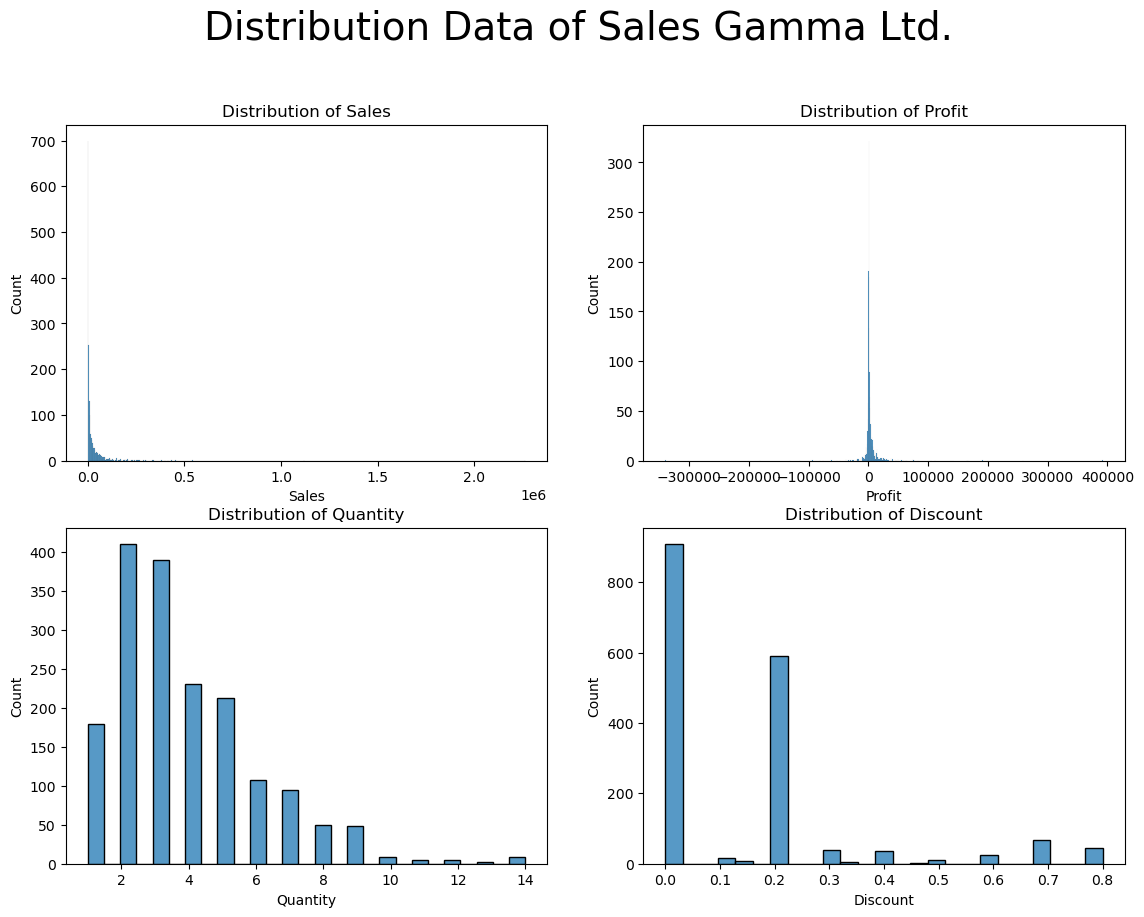

In [38]:
#Let's see distribution of the data
number = ['Sales', 'Profit', 'Quantity', 'Discount']
canvas = 0
n_width = 2
n_rows = 2
plt.figure(figsize=(13.66, 9.6))
for d in range(n_rows):
    for f in range(n_width):
        if canvas == 5:
            break
        else:
            plt.subplot(n_rows, n_width, canvas+1)
            sns.histplot(data=source, x=number[canvas])
            plt.title(f'Distribution of {number[canvas]}')
            canvas+=1
plt.suptitle('Distribution Data of Sales Gamma Ltd.', size=28, y=1.00)
plt.show()

We can see from chart above, our dataset doesn't distribute normally. So, we gonna should use median value as average parameter for our analysis.

In [39]:
#Compute Customer Spending Every Continent
customer_spending = source.pivot_table(index='Continent', columns='Year', values='Sales', aggfunc='median').round(1).rename_axis(None, axis=1).reset_index()

#Create Bar Chart
fig_spending = px.bar(customer_spending, x='Continent', y=[c for c in customer_spending.columns if c != 'Region'],
             title='Spending Customer per Continents in USD',
             labels={'value': 'Customer Spending', 'variable': 'Year'},
             barmode='group')
fig_spending.show()
display(customer_spending)

,Continent,2020,2021,2022,2023
0,AMER,5388.0,6084.0,3888.0,5994.0
1,APAC,3948.0,7206.7,4369.4,4337.2
2,EU,6156.8,4798.0,5448.0,6134.0


We have determined the **Customer Spending** from the continents of the Americas, Asia-Pacific, and Europe each year. We will use the **Customer Spending** as a Parameter to further identify the **Customer Spending** from each **Region** of every **Continents**.

Now, we already have our **Parameters** as based to determine potential location for new **Gamma Branch Office** locations. Further analysis, shall we go to tableau via link below or :

https://public.tableau.com/views/Shidqi_JCDS0406011_CapstoneModul2/DistributionofCustomer?:language=en-US&:display_count=n&:origin=viz_share_link

For see deeper our data 

Next, let's we look further to evaluated based on **Regions** in Asia-Pacific, Europe, Americas continents. 

#### Asia-Pacific (APAC)

Now shall we look up APAC Continent

In [40]:
# Asia-Pacific (APAC) Transaction
apac = source[source['Continent'] == 'APAC']
apac.sort_values(by='Order ID', inplace=True)
apac.reset_index(inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\2745296949.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
#Country at East Asia
list_apac_country = []
for x in apac['Region'].unique():
    list_apac_country.append([x, apac[apac['Region'] == x]['Country'].nunique(), apac[apac['Region'] == x]['Country'].unique()])
apac_country = pd.DataFrame(data = list_apac_country,
                            columns = ['Region', 'Number of Country', 'Country'])
apac_country.sort_values(by='Number of Country', ascending=False, inplace=True)
apac_country.reset_index(inplace=True, drop=True)
apac_country

,Region,Number of Country,Country
0,EA,4,"[Japan, South Korea, China, Taiwan]"
1,WA,4,"[Israel, Saudi Arabia, United Arab Emirates, Qatar]"
2,SEA,3,"[Philippines, Singapore, Indonesia]"
3,ANZ,2,"[New Zealand, Australia]"
4,SA,1,[India]


* There are 5 Regions at Asia-Pacific Continent. Gamma customers in South Asia (SA) are just at India not like the other regions which spreaded to some countries. For now, we don't recommend yet South Asia as a visible Branch Office location.

* We will look further **demand trend** and **customer spending** at East Asia (EA), Southeast Asia (SEA), Australia-New Zealand (ANZ), and West Asia (WA) region to examine **visible region**.

In [42]:
#Customer Spending at Asia-Pacific (APAC)
apac_spending = apac.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='median').round(1).rename_axis(None, axis=1).reset_index()

##### East Asia Analysis

In [43]:
#Determine Demand per Year of East Asia in Asia-Pacific (APAC)
ea = apac[apac['Region'] == 'EA']
list_demand_ea = []
for x in ea['Year'].unique():
    for y in ea['Country'].unique():
        list_demand_ea.append([x, y, ea[(ea['Year'] == x) & (ea['Country'] == y)]['Customer ID'].nunique(), ea[(ea['Year'] == x) & (ea['Country'] == y)]['Order ID'].nunique(), round(ea[(ea['Year'] == x) & (ea['Country'] == y)]['Sales'].median(), 0), ea[(ea['Year'] == x) & (ea['Country'] == y)]['Sales'].sum(), ea[(ea['Year'] == x) & (ea['Country'] == y)]['Profit'].sum()])
data_ea = pd.DataFrame(data = list_demand_ea,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_ea.dropna(inplace=True)

# Sum the demand for each year
data_ea_sum = data_ea.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at East Asia
ea_spending = apac_spending[apac_spending['Region'] == 'EA']

In [44]:
#Showing Parameter
print('Average Demand at Asia-Pacific (APAC)')
display(average_demand[average_demand['Continent'] == 'APAC'])
print("Customer Spending at Asia-Pacific (APAC) in USD")
display(customer_spending[customer_spending['Continent'] == 'APAC'])


#Create EA Line Chart
figDemandEA = go.Figure()

# Add a line trace for demand
figDemandEA.add_trace(go.Scatter(x=data_ea_sum['Year'], y=data_ea_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='red')))

# Create annotations
EA_annotations = [go.layout.Annotation(x=year, y=data_ea_sum[data_ea_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${ea_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in ea_spending.columns if year in data_ea_sum['Year'].values]

# Update layout
figDemandEA.update_layout(title='Demand Trend in East Asia', xaxis_title='Year', yaxis_title='Demand', annotations=EA_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandEA.show()

Average Demand at Asia-Pacific (APAC)


,Continent,2020,2021,2022,2023
1,APAC,5,4,6,10


Customer Spending at Asia-Pacific (APAC) in USD


,Continent,2020,2021,2022,2023
1,APAC,3948.0,7206.7,4369.4,4337.2


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\4289460650.py:20: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **East Asia**. East Asia are considered **Visible Regions** as they meet the predetermined criteria for demand and consumer spending.

Now we look customer distribution, sales trend, and product demand from countries at East Asia to examine visible location for the branch office  and potential countries who deserved an account managers.

In [45]:
#Sum of Total Customer and Profit per Countries
east_asia_customer = data_ea.groupby('Country')['Total Customer'].sum().reset_index()

#Sum of Sales and Profit per Countries and Years
east_asia_sales = data_ea.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
china2022_sales = {'Country' : 'China', 'Year' : 2022, 'Sales': 0, 'Profit' : 0}
east_asia_sales = east_asia_sales.append(china2022_sales, ignore_index=True)
east_asia_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at East Asia
list_product_ea = []

for y in ea['Country'].unique():
    for z in ea['Product'].unique():
        list_product_ea.append([y, z, ea[(ea['Country'] == y) & (ea['Product'] == z)]['Quantity'].sum(), ea[(ea['Country'] == y) & (ea['Product'] == z)]['Sales'].sum(), ea[(ea['Country'] == y) & (ea['Product'] == z)]['Profit'].sum()])
product_ea = pd.DataFrame(data = list_product_ea, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_ea = product_ea[product_ea['Demand of Product'] != 0]
product_ea.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_eastasia = product_ea.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_eastasia['NPM of Product'] = round((product_eastasia['Profit of Product']/product_eastasia['Sales of Product'])*100, 1)
product_eastasia.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_eastasia = product_eastasia[0:10]

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\3726840148.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [46]:
# Define a color for each country
colors_country = {
    'China': 'Red',
    'Japan': 'Blue',
    'South Korea': 'Green',
    'Taiwan': 'Yellow',
}

# Define a color for each product
colors_product = {
    'ContactMatcher': '#636EFA',
    'Support': '#EF553B',
    'FinanceHub': '#00CC96',
    'SaaS Connector Pack': '#AB63FA',
    'Data Smasher': '#FFA15A',
    'Marketing Suite - Gold': '#19D3F3',
    'Site Analytics': '#FF6692',
    'ChatBot Plugin': '#B6E880',
    'OneView': '#FF97FF',
    'SaaS Connector Pack - Gold': '#FECB52'
}

# Create a list of colors for each country
color_list_country = [colors_country[country] for country in east_asia_customer['Country']]

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_eastasia.index]

# Create a Customer Pie chart
EAfig_customer = go.Figure(data=go.Pie(labels=east_asia_customer['Country'], values=east_asia_customer['Total Customer'], marker_colors=color_list_country))

# Create a line chart for each country
EAfig_sales = go.Figure()
for country in east_asia_sales['Country'].unique():
    country_data = east_asia_sales[east_asia_sales['Country'] == country]
    EAfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
EAfig_product = go.Figure(data=go.Bar(x=product_eastasia.index, 
                            y=product_eastasia['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_eastasia['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
EAfig_customer.update_layout(
    title='Total Customers per Country in East Asia',
)
EAfig_sales.update_layout(
    title='Sales Trend in East Asia',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
EAfig_product.update_layout(
    title='Demand of Product in East Asia',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
EAfig_customer.show()
EAfig_sales.show()
EAfig_product.show()

##### East Asia Recomendation

* We can see most customers at East Asia are from **Japan**, so the visible country for the Office location of East Asia Branch are at **Japan**.

* All countries at East Asia except Taiwan have a positive sales growth. Even though in 2022 sales is decreased, in 2023 sales is bounce back again. Sales at **China** still smaller and the gap compared to South Korea and Japan are quitely significant. So, **Japan** and **South Korea** are the potential countries at East Asia. Company should assign account managers in Japan Branch Office for customers in **China**, **Japan**, and **South Korea**.

* About the products, **contact matcher** is the most demanded product in East Asia but make the company suffer losses. With high demand for the contact matcher this indicate the market need the product. **Account manager** in Japan Brach Office must collaborate with our team to do deeper analysis and give recommendation to company for what should do to make profit from contact matcher in East Asia.

* In the other side, **support** is the most profitable product in East Asia and also became the second most products demanded in East Asia, so we can say **support** is the most effective product in East Asia and company should make sure that the members of **Account Manager** in Japan Office have good product knowledge about **support**.

In [47]:
# #Branch Office at East Asia
# east_asia_customer = pd.merge(east_asia_customer, df, on='Country')

In [48]:
# import folium

# # Create a map centered around East Asia
# m = folium.Map(location=[35.8617, 104.1954], zoom_start=4)

# # Add a marker for each country
# for idx, row in east_asia_customer.iterrows():
#     country_name = row['Country']
#     folium.Marker([row['Latitude'], row['Longitude']], 
#                   popup=f"Number of Customer: {row['Total Customer']}", 
#                   tooltip=row['Country']).add_to(m)

# # Display the map
# m

##### Australia-New Zealand (ANZ) Analysis

In [49]:
#Determine Demand per Year of Australia-New Zealand in Asia-Pacific (APAC)
anz = apac[apac['Region'] == 'ANZ']
list_demand_anz = []
for x in anz['Year'].unique():
    for y in anz['Country'].unique():
        list_demand_anz.append([x, y, anz[(anz['Year'] == x) & (anz['Country'] == y)]['Customer ID'].nunique(), anz[(anz['Year'] == x) & (anz['Country'] == y)]['Order ID'].nunique(), round(anz[(anz['Year'] == x) & (anz['Country'] == y)]['Sales'].median(), 0), anz[(anz['Year'] == x) & (anz['Country'] == y)]['Sales'].sum(), anz[(anz['Year'] == x) & (anz['Country'] == y)]['Profit'].sum()])
data_anz = pd.DataFrame(data = list_demand_anz,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_anz.dropna(inplace=True)

# Sum the demand for each year
data_anz_sum = data_anz.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at East Asia
anz_spending = apac_spending[apac_spending['Region'] == 'ANZ']

In [50]:
#Showing Parameter
print('Average Demand in Asia-Pacific (APAC)')
display(average_demand[average_demand['Continent'] == 'APAC'])
print("Average Customer Spending in Asia-Pacific (APAC) in USD")
display(customer_spending[customer_spending['Continent'] == 'APAC'])

#Create ANZ Line Chart
figDemandANZ = go.Figure()

# Add a line trace for demand
figDemandANZ.add_trace(go.Scatter(x=data_anz_sum['Year'], y=data_anz_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='purple')))

# Create annotations
ANZ_annotations = [go.layout.Annotation(x=year, y=data_anz_sum[data_anz_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${anz_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in anz_spending.columns if year in data_anz_sum['Year'].values]

# Update layout
figDemandANZ.update_layout(title='Demand Trend in Australia-New Zealand', xaxis_title='Year', yaxis_title='Demand', annotations=ANZ_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandANZ.show()

Average Demand in Asia-Pacific (APAC)


,Continent,2020,2021,2022,2023
1,APAC,5,4,6,10


Average Customer Spending in Asia-Pacific (APAC) in USD


,Continent,2020,2021,2022,2023
1,APAC,3948.0,7206.7,4369.4,4337.2


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\1513817561.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Australia-New Zealand**. ANZ are considered **Visible Regions** as they meet the predetermined criteria for demand and consumer spending.

Now we look customer distribution, sales trend, and product demand from countries at Australia-New Zealand to examine visible location for the branch office and potential countries who deserved an account managers.

In [51]:
#Sum of Total Customer per Countries
anz_customer = data_anz.groupby('Country')['Total Customer'].sum().reset_index()

#Sum of Sales and Profit per Countries and Years
anz_sales = data_anz.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
newzealand2022_sales = {'Country' : 'New Zealand', 'Year' : 2022, 'Sales': 0, 'Profit' : 0}
anz_sales = anz_sales.append(newzealand2022_sales, ignore_index=True)
anz_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Australia-New Zealand
list_product_anz = []

for y in anz['Country'].unique():
    for z in anz['Product'].unique():
        list_product_anz.append([y, z, anz[(anz['Country'] == y) & (anz['Product'] == z)]['Quantity'].sum(), anz[(anz['Country'] == y) & (anz['Product'] == z)]['Sales'].sum(), anz[(anz['Country'] == y) & (anz['Product'] == z)]['Profit'].sum()])
product_anz = pd.DataFrame(data = list_product_anz, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_anz.dropna(inplace=True)
product_anz.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_australia_newzealand = product_anz.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_australia_newzealand['NPM of Product'] = round((product_australia_newzealand['Profit of Product']/product_australia_newzealand['Sales of Product'])*100, 1)
product_australia_newzealand.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_australia_newzealand = product_australia_newzealand[0:10]

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\282959409.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [52]:
# Define a color for each country
colors_country = {
    'Australia': 'Red',
    'New Zealand': 'Blue',
}

# Define a color for each product
colors_product = {
    'Support': '#EF553B',
    'ContactMatcher': '#636EFA',
    'FinanceHub': '#00CC96',
    'Data Smasher': '#FFA15A',
    'Site Analytics': '#FF6692',
    'ChatBot Plugin': '#B6E880',
    'Marketing Suite - Gold': '#19D3F3',
    'SaaS Connector Pack': '#AB63FA',
    'Big Ol Database': '#FECB52',
    'OneView': '#FF97FF'
}

# Create a list of colors for each country
color_list_country = [colors_country[country] for country in anz_customer['Country']]

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_australia_newzealand.index]

# Create a Customer Pie chart
ANZfig_customer = go.Figure(data=go.Pie(labels=anz_customer['Country'], values=anz_customer['Total Customer'], marker_colors=color_list_country))

# Create a line chart for each country
ANZfig_sales = go.Figure()
for country in anz_sales['Country'].unique():
    country_data = anz_sales[anz_sales['Country'] == country]
    ANZfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
ANZfig_product = go.Figure(data=go.Bar(x=product_australia_newzealand.index, 
                            y=product_australia_newzealand['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_australia_newzealand['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
ANZfig_customer.update_layout(
    title='Total Customers per Country in Australia-New Zealand',
)
ANZfig_sales.update_layout(
    title='Sales Trend in Australia-New Zealand',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
ANZfig_product.update_layout(
    title='Demand of Product in Australia-New Zealand',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
ANZfig_customer.show()
ANZfig_sales.show()
ANZfig_product.show()

##### Australia-New Zealand Recomendation

* We can see majority customers at Australia-New Zealand are from **Australia** just 10% customers are from New Zealand, so the visible country for the office location of Australia-New Zealand Branch are at **Australia**.

* New Zealand have fluctuative sales and the gap between sales at New Zealand and Australia is very high. So, the potential country at Australia-New Zealand region are just **Australia**.

* About the products, **Support** is the most profitable product in ANZ region and also became the most products demanded in ANZ region, so we can say **Support** is the most effective product in ANZ region and company should make sure that the members of **Account Manager** in Australia Office have good product knowledge about **Support**.

* And then in Australia-New Zealand region there are some products with high demand like **Contact matcher** which are the second most demanded product in Australia-New Zealand but make the company **suffer very big losses with more than 100% loss**. There are some products that make company suffer great losses like contact matcher. **Account Manager** in Australia Branch Office must immediately collaborate with our team to do deeper analysis to examine the loss causes and give recommendation to company for what should do to stop the loss and start make profit from this product in Australia-New Zealand region.

##### Southeast Asia (SEA)

In [53]:
#Determine Demand per Year of Southeast Asia in Asia-Pacific (APAC)
sea = apac[apac['Region'] == 'SEA']
list_demand_sea = []
for x in sea['Year'].unique():
    for y in sea['Country'].unique():
        list_demand_sea.append([x, y, sea[(sea['Year'] == x) & (sea['Country'] == y)]['Customer ID'].nunique(), sea[(sea['Year'] == x) & (sea['Country'] == y)]['Order ID'].nunique(), round(sea[(sea['Year'] == x) & (sea['Country'] == y)]['Sales'].median(), 0), sea[(sea['Year'] == x) & (sea['Country'] == y)]['Sales'].sum(), sea[(sea['Year'] == x) & (sea['Country'] == y)]['Profit'].sum()])
data_sea = pd.DataFrame(data = list_demand_sea,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_sea.dropna(inplace=True)

# Sum the demand for each year
data_sea_sum = data_sea.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Southeast Asia
sea_spending = apac_spending[apac_spending['Region'] == 'SEA']

In [54]:
#Showing Parameter
print('Average Demand in Asia-Pacific (APAC)')
display(average_demand[average_demand['Continent'] == 'APAC'])
print("Average Customer Spending in Asia-Pacific (APAC) in USD")
display(customer_spending[customer_spending['Continent'] == 'APAC'])

#Create SEA Line Chart
figDemandSEA = go.Figure()

# Add a line trace for demand
figDemandSEA.add_trace(go.Scatter(x=data_sea_sum['Year'], y=data_sea_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='blue')))

# Create annotations
SEA_annotations = [go.layout.Annotation(x=year, y=data_sea_sum[data_sea_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${sea_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in sea_spending.columns if year in data_sea_sum['Year'].values]

# Update layout
figDemandSEA.update_layout(title='Demand Trend in Southeast Asia', xaxis_title='Year', yaxis_title='Demand', annotations=SEA_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandSEA.show()

Average Demand in Asia-Pacific (APAC)


,Continent,2020,2021,2022,2023
1,APAC,5,4,6,10


Average Customer Spending in Asia-Pacific (APAC) in USD


,Continent,2020,2021,2022,2023
1,APAC,3948.0,7206.7,4369.4,4337.2


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\2200081885.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from **Southeast Asia**. The demand in Southeast Asia are still low but the customer spending are high enough, moreover in 2020 and 2021. Then, Southeast Asia shows positive growth in demand. So, Southeast Asia are considered **Potential Region**. As potential region company should assign **Account Manager** for countries at Southeast Asia from closer Branch Office.

Now we look sales trend and product demand from countries at Southeast Asia to examine potential country who deserved an account managers.

In [55]:
#Sum of Sales and Profit per Countries and Years
sea_sales = data_sea.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
sea_adjustment_sales = [{'Country' : 'Philippines', 'Year' : 2022, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Indonesia', 'Year' : 2023, 'Sales': 0, 'Profit' : 0}]
sea_sales = sea_sales.append(sea_adjustment_sales, ignore_index=True)
sea_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Southeast Asia
list_product_sea = []

for y in sea['Country'].unique():
    for z in sea['Product'].unique():
        list_product_sea.append([y, z, sea[(sea['Country'] == y) & (sea['Product'] == z)]['Quantity'].sum(), sea[(sea['Country'] == y) & (sea['Product'] == z)]['Sales'].sum(), sea[(sea['Country'] == y) & (sea['Product'] == z)]['Profit'].sum()])
product_sea = pd.DataFrame(data = list_product_sea, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_sea.dropna(inplace=True)
product_sea.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_southeastasia = product_sea.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_southeastasia['NPM of Product'] = round((product_southeastasia['Profit of Product']/product_southeastasia['Sales of Product'])*100, 1)
product_southeastasia.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\4107467546.py:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [56]:
# Define a color for each country
colors_country = {
    'Indonesia': 'Red',
    'Philippines': 'Blue',
    'Singapore': 'Orange',
}

# Define a color for each product
colors_product = {
    'ContactMatcher': '#636EFA',
    'Site Analytics': '#FF6692',
    'FinanceHub': '#00CC96',
    'ChatBot Plugin': '#B6E880',
    'Data Smasher': '#FFA15A',
    'Support': '#EF553B',
    'OneView': '#FF97FF',
    'Marketing Suite - Gold': '#19D3F3',
    'SaaS Connector Pack': '#AB63FA',
}

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_southeastasia.index]

# Create a line chart for each country
SEAfig_sales = go.Figure()
for country in sea_sales['Country'].unique():
    country_data = sea_sales[sea_sales['Country'] == country]
    SEAfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
SEAfig_product = go.Figure(data=go.Bar(x=product_southeastasia.index, 
                            y=product_southeastasia['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_southeastasia['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
SEAfig_sales.update_layout(
    title='Sales Trend in Southeast Asia',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
SEAfig_product.update_layout(
    title='Demand of Product in Southeast Asia',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
SEAfig_sales.show()
SEAfig_product.show()

##### Southeast Asia Recomendation

* As we can see, the sales trend in Indonesia is declining. While, the sales trend in Philippines is fluctuative. Only Singapore who have positive growth of the sales. So, we just recommend **Singapore** as the potential country from Southeast Asia who deserve an **account manager**.

* Due to geographical and language considerations it is recommended that the account manager for Singapore are from the **branch office in Australia**.

* About the products, **Contact Matcher** is the most demanded and the most profitable products in Southeast Asia, so we can say **contact matcher** is the most effective product in Southeast Asia and company should make sure that the **Account Manager** for Singapore in Australia branch office have good product knowledge about **contact matcher**.

##### West Asia

In [57]:
#Determine Demand per Year of West Asia in Asia-Pacific (APAC)
wa = apac[apac['Region'] == 'WA']
list_demand_wa = []
for x in wa['Year'].unique():
        for y in wa['Country'].unique():
            list_demand_wa.append([x, wa[(wa['Year'] == x) & (wa['Country'] == y)]['Region'].unique(), y, wa[(wa['Year'] == x) & (wa['Country'] == y)]['Order ID'].nunique(), round(wa[(wa['Year'] == x) & (wa['Country'] == y)]['Sales'].median(), 0), wa[(wa['Year'] == x) & (wa['Country'] == y)]['Sales'].sum(), wa[(wa['Year'] == x) & (wa['Country'] == y)]['Profit'].sum()])
demand_wa = pd.DataFrame(data = list_demand_wa,
                               columns = ['Year', 'Region', 'Country', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
demand_wa.dropna(inplace=True)

# Sum the demand for each year
demand_wa_sum = demand_wa.groupby('Year')['Demand'].sum().reset_index()

wa_spending = apac_spending[apac_spending['Region'] == 'WA']

In [58]:
#Showing Parameter
print('Average Demand in Asia-Pacific (APAC)')
display(average_demand[average_demand['Continent'] == 'APAC'])
print("Average Customer Spending in Asia-Pacific (APAC) in USD")
display(customer_spending[customer_spending['Continent'] == 'APAC'])

#Create WA Line Chart
figDemandWA = go.Figure()

# Add a line trace for demand
figDemandWA.add_trace(go.Scatter(x=demand_wa_sum['Year'], y=demand_wa_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='green')))

# Create annotations
WA_annotations = [go.layout.Annotation(x=year, y=demand_wa_sum[demand_wa_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${wa_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in wa_spending.columns if year in demand_wa_sum['Year'].values]

# Update layout
figDemandWA.update_layout(title='Demand Trend in West Asia', xaxis_title='Year', yaxis_title='Demand', annotations=WA_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandWA.show()

Average Demand in Asia-Pacific (APAC)


,Continent,2020,2021,2022,2023
1,APAC,5,4,6,10


Average Customer Spending in Asia-Pacific (APAC) in USD


,Continent,2020,2021,2022,2023
1,APAC,3948.0,7206.7,4369.4,4337.2


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\1981930987.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Customer Spending** trend from **West Asia**. The demand and customers spending in West Asia are **still low**. Right now West Asia are not recommend yet to opening branch office and assigned account manager for customer at West Asia.

#### Europe (EU)

Next, shall we look up Europe Region

In [59]:
# Europe(EU) Transaction
eu = source[source['Continent'] == 'EU']
eu.sort_values(by='Order ID', inplace=True)
eu.reset_index(inplace=True, drop=True)

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\293759880.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [60]:
#Country at Europe
list_eu_country = []
for x in eu['Region'].unique():
    list_eu_country.append([x, eu[eu['Region'] == x]['Country'].nunique(), eu[eu['Region'] == x]['Country'].unique()])
eu_country = pd.DataFrame(data = list_eu_country,
                            columns = ['Region', 'Number of Country', 'Country'])
eu_country.sort_values(by='Number of Country', ascending=False, inplace=True)
eu_country.reset_index(inplace=True, drop=True)
eu_country

,Region,Number of Country,Country
0,EU-WEST,9,"[Germany, United Kingdom, Poland, France, Luxembourg, Ireland, Netherlands, Belgium, Austria]"
1,SOR,5,"[Turkey, Spain, Italy, Greece, Portugal]"
2,NOR,5,"[Norway, Sweden, Finland, Denmark, Iceland]"
3,EU-EAST,4,"[Russia, Czech Republic, Ukraine, Slovenia]"


In [61]:
#Customer Spending at Europe
eu_spending = eu.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='median').round(1).rename_axis(None, axis=1).reset_index()

##### Western Europe (EU-WEST) Analysis

In [62]:
#Determine Demand per Year of Western Europe in Europe (EU)
weu = eu[eu['Region'] == 'EU-WEST']
list_demand_weu = []
for x in weu['Year'].unique():
    for y in weu['Country'].unique():
        list_demand_weu.append([x, y, weu[(weu['Year'] == x) & (weu['Country'] == y)]['Customer ID'].nunique(), weu[(weu['Year'] == x) & (weu['Country'] == y)]['Order ID'].nunique(), round(weu[(weu['Year'] == x) & (weu['Country'] == y)]['Sales'].median(), 0), weu[(weu['Year'] == x) & (weu['Country'] == y)]['Sales'].sum(), weu[(weu['Year'] == x) & (weu['Country'] == y)]['Profit'].sum()])
data_weu = pd.DataFrame(data = list_demand_weu,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_weu.dropna(inplace=True)

# Sum the demand for each year
data_weu_sum = data_weu.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Western Europe
weu_spending = eu_spending[eu_spending['Region'] == 'EU-WEST']

In [63]:
#Showing Parameter
print('Average Demand in Europe')
display(average_demand[average_demand['Continent'] == 'EU'])
print("Average Customer Spending in Europe (EU) in USD")
display(customer_spending[customer_spending['Continent'] == 'EU'])

#Create WA Line Chart
figDemandWEU = go.Figure()

# Add a line trace for demand
figDemandWEU.add_trace(go.Scatter(x=data_weu_sum['Year'], y=data_weu_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='green')))

# Create annotations
WEU_annotations = [go.layout.Annotation(x=year, y=data_weu_sum[data_weu_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${weu_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in weu_spending.columns if year in data_weu_sum['Year'].values]

# Update layout
figDemandWEU.update_layout(title='Demand Trend in Western Europe', xaxis_title='Year', yaxis_title='Demand', annotations=WEU_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandWEU.show()

Average Demand in Europe


,Continent,2020,2021,2022,2023
2,EU,8,8,16,14


Average Customer Spending in Europe (EU) in USD


,Continent,2020,2021,2022,2023
2,EU,6156.8,4798.0,5448.0,6134.0


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\4205420054.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Western Europe**. Western Europe are considered **Visible Regions** as they meet the predetermined criteria for demand and consumer spending.

Now we look customer distribution, sales trend, and product demand from countries at Western Europe to examine visible location for the branch office and potential countries who deserved an account managers.

In [64]:
#Sum of Total Customer per Countries
weu_customer = data_weu.groupby('Country')['Total Customer'].sum().reset_index()

#Sum of Sales and Profit per Countries and Years
weu_sales = data_weu.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
weuadjustment_sales = [{'Country' : 'Austria', 'Year' : 2020, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Austria', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Belgium', 'Year' : 2020, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Belgium', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Netherlands', 'Year' : 2022, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Poland', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}]
weu_sales = weu_sales.append(weuadjustment_sales, ignore_index=True)
weu_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Western Europe
list_product_weu = []

for y in weu['Country'].unique():
    for z in weu['Product'].unique():
        list_product_weu.append([y, z, weu[(weu['Country'] == y) & (weu['Product'] == z)]['Quantity'].sum(), weu[(weu['Country'] == y) & (weu['Product'] == z)]['Sales'].sum(), weu[(weu['Country'] == y) & (weu['Product'] == z)]['Profit'].sum()])
product_weu = pd.DataFrame(data = list_product_weu, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_weu.dropna(inplace=True)
product_weu.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_western_europe = product_weu.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_western_europe['NPM of Product'] = round((product_western_europe['Profit of Product']/product_western_europe['Sales of Product'])*100, 1)
product_western_europe.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_western_europe = product_western_europe[0:10]

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\2390826111.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [65]:
# Define a color for each country
colors_country = {
    'Austria': 'Red',
    'Belgium': 'Yellow',
    'France': 'Blue',
    'Germany': 'Black',
    'Ireland': 'Orange',
    'Luxembourg': 'Purple',
    'Netherlands': 'Brown',
    'Poland': 'Pink',
    'United Kingdom': 'Green',
}

# Define a color for each product
colors_product = {
    'ContactMatcher': '#636EFA',
    'Support': '#EF553B',
    'FinanceHub': '#00CC96',
    'Site Analytics': '#FF6692',
    'ChatBot Plugin': '#B6E880',
    'SaaS Connector Pack': '#AB63FA',
    'Marketing Suite - Gold': '#19D3F3',
    'Data Smasher': '#FFA15A',
    'OneView': '#FF97FF',
    'Big Ol Database': '#FECB52'
}

# Create a list of colors for each country
color_list_country = [colors_country[country] for country in weu_customer['Country']]

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_western_europe.index]

# Create a Customer Pie chart
WEUfig_customer = go.Figure(data=go.Pie(labels=weu_customer['Country'], values=weu_customer['Total Customer'], marker_colors=color_list_country))

# Create a line chart for each country
WEUfig_sales = go.Figure()
for country in weu_sales['Country'].unique():
    country_data = weu_sales[weu_sales['Country'] == country]
    WEUfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
WEUfig_product = go.Figure(data=go.Bar(x=product_western_europe.index, 
                            y=product_western_europe['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_western_europe['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
WEUfig_customer.update_layout(
    title='Total Customers per Country in Western Europe',
)
WEUfig_sales.update_layout(
    title='Sales Trend in Western Europe',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
WEUfig_product.update_layout(
    title='Demand of Product in Western Europe',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
WEUfig_customer.show()
WEUfig_sales.show()
WEUfig_product.show()

##### Western Europe Recommendation

* We can see the most customers at Western Europe are from **United Kingdom** with 37.1%, so the visible country for the Office location of Western Europe Branch are at **United Kingdom**.

* Only United Kingdom and France who have a positive sales growth. Since 2020 United Kingdom always have the most sales in Western Europe, though in 2022 France reduce the sales gap between United Kingdom before UK have an significant growth in 20223. Sales at **Germany** were once the highest in 2020, but after that the sales Germany are declining and have not recovered yet. So, **United Kingdom** and **France** are the potential countries at Western Europe. Company should assign account managers in United Kingdom Branch Office for customers in **United Kingdom** and **France**.

* Next about the products, **contact matcher** is the most demanded product in Western Europe but make the company suffer losses. With high demand for the contact matcher this indicate the market need the product. **Account manager** in United Kingom Brach Office must collaborate with our team to do deeper analysis and give recommendation to company for what should do to make profit from contact matcher in Western Europe.

* In the other side, **support** is the most profitable product in Western Europe and also became the second most products demanded in Western Europe, so we can say **support** is the most effective product in Western Europe and company should make sure that the members of **Account Manager** in United Kingdom Office have good product knowledge about **support**.

##### Northern Europe (NOR)

In [66]:
#Determine Demand per Year of Northern Europe in Europe (EU)
nor = eu[eu['Region'] == 'NOR']
list_demand_nor = []
for x in nor['Year'].unique():
    for y in nor['Country'].unique():
        list_demand_nor.append([x, y, nor[(nor['Year'] == x) & (nor['Country'] == y)]['Customer ID'].nunique(), nor[(nor['Year'] == x) & (nor['Country'] == y)]['Order ID'].nunique(), round(nor[(nor['Year'] == x) & (nor['Country'] == y)]['Sales'].median(), 0), nor[(nor['Year'] == x) & (nor['Country'] == y)]['Sales'].sum(), nor[(nor['Year'] == x) & (nor['Country'] == y)]['Profit'].sum()])
data_nor = pd.DataFrame(data = list_demand_nor,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_nor.dropna(inplace=True)

# Sum the demand for each year
data_nor_sum = data_nor.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Northern Europe
nor_spending = eu_spending[eu_spending['Region'] == 'NOR']

In [67]:
#Showing Parameter
print('Average Demand in Europe')
display(average_demand[average_demand['Continent'] == 'EU'])
print("Average Customer Spending in Europe (EU) in USD")
display(customer_spending[customer_spending['Continent'] == 'EU'])

#Create NOR Line Chart
figDemandNOR = go.Figure()

# Add a line trace for demand
figDemandNOR.add_trace(go.Scatter(x=data_nor_sum['Year'], y=data_nor_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='blue')))

# Create annotations
NOR_annotations = [go.layout.Annotation(x=year, y=data_nor_sum[data_nor_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${nor_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in nor_spending.columns if year in data_nor_sum['Year'].values]

# Update layout
figDemandNOR.update_layout(title='Demand Trend in Northern Europe', xaxis_title='Year', yaxis_title='Demand', annotations=NOR_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandNOR.show()

Average Demand in Europe


,Continent,2020,2021,2022,2023
2,EU,8,8,16,14


Average Customer Spending in Europe (EU) in USD


,Continent,2020,2021,2022,2023
2,EU,6156.8,4798.0,5448.0,6134.0


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\3158554526.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Northern Europe**. Northern Europe are not visible region but an **potential region** because Northern Europe **doesn't have high demand** though have a good customer spending and still have positive growth in demand. So, Northern Europe deserve to have an **account manager**.

In [68]:
#Sum of Sales and Profit per Countries and Years
nor_sales = data_nor.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
nor_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Northern Europe
list_product_nor = []

for y in nor['Country'].unique():
    for z in nor['Product'].unique():
        list_product_nor.append([y, z, nor[(nor['Country'] == y) & (nor['Product'] == z)]['Quantity'].sum(), nor[(nor['Country'] == y) & (nor['Product'] == z)]['Sales'].sum(), nor[(nor['Country'] == y) & (nor['Product'] == z)]['Profit'].sum()])
product_nor = pd.DataFrame(data = list_product_nor, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_nor.dropna(inplace=True)
product_nor.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_northerneurope = product_nor.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_northerneurope['NPM of Product'] = round((product_northerneurope['Profit of Product']/product_northerneurope['Sales of Product'])*100, 1)
product_northerneurope.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_northerneurope = product_northerneurope[0:10]

In [69]:
# Define a color for each country
colors_country = {
    'Denmark': 'Red',
    'Finland': 'Blue',
    'Norway': 'Green',
    'Sweden': 'Yellow',
    'Iceland': 'Orange',
}

# Define a color for each product
colors_product = {
    'Support': '#EF553B',
    'Marketing Suite - Gold': '#19D3F3',
    'ContactMatcher': '#636EFA',
    'Data Smasher': '#FFA15A',
    'SaaS Connector Pack': '#AB63FA',
    'Site Analytics': '#FF6692',
    'FinanceHub': '#00CC96',
    'ChatBot Plugin': '#B6E880',
    'SaaS Connector Pack - Gold': '#AB63FA',
    'Alchemy': '#FF97FF',
}

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_northerneurope.index]

# Create a line chart for each country
NORfig_sales = go.Figure()
for country in nor_sales['Country'].unique():
    country_data = nor_sales[nor_sales['Country'] == country]
    NORfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
NORfig_product = go.Figure(data=go.Bar(x=product_northerneurope.index, 
                            y=product_northerneurope['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_northerneurope['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
NORfig_sales.update_layout(
    title='Sales Trend in Northern Europe',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
NORfig_product.update_layout(
    title='Demand of Product in Northern Europe',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
NORfig_sales.show()
NORfig_product.show()

##### Northern Europe Recommendation

* As we can see the sales trend in Norway is fluctuative. Although it was once the highest sales in Northern Europe back in 2022, but in 2023 the sales in Norway significantly decline. The sales of Sweden and Finland are more stable and have positive growth. So, we just recommend **Sweden** and **Finland** as the potential countries from Northern Europe who deserve an **account manager**.

* Due to geographical considerations it is recommended that the account manager for Sweden and Finland are from the **branch office in UK**.

* About the products, **support** is the most demanded and the most profitable products in Northern Europe, so we can say support is the most effective product in Northern Europe and company should make sure that the **Account Manager** for Sweden and Finland in UK branch office have good product knowledge about **support**.

##### Southern Europe (SOR)

In [70]:
#Determine Demand per Year of Northern Europe in Europe (EU)
sor = eu[eu['Region'] == 'SOR']
list_demand_sor = []
for x in sor['Year'].unique():
    for y in sor['Country'].unique():
        list_demand_sor.append([x, y, sor[(sor['Year'] == x) & (sor['Country'] == y)]['Customer ID'].nunique(), sor[(sor['Year'] == x) & (sor['Country'] == y)]['Order ID'].nunique(), round(sor[(sor['Year'] == x) & (sor['Country'] == y)]['Sales'].median(), 0), sor[(sor['Year'] == x) & (sor['Country'] == y)]['Sales'].sum(), sor[(sor['Year'] == x) & (sor['Country'] == y)]['Profit'].sum()])
data_sor = pd.DataFrame(data = list_demand_sor,
                        columns = ['Year', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_sor.dropna(inplace=True)

# Sum the demand for each year
data_sor_sum = data_sor.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Southern Europe
sor_spending = eu_spending[eu_spending['Region'] == 'SOR']

In [71]:
#Showing Parameter
print('Average Demand in Europe')
display(average_demand[average_demand['Continent'] == 'EU'])
print("Average Customer Spending in Europe (EU) in USD")
display(customer_spending[customer_spending['Continent'] == 'EU'])

#Create SOR Line Chart
figDemandSOR = go.Figure()

# Add a line trace for demand
figDemandSOR.add_trace(go.Scatter(x=data_sor_sum['Year'], y=data_sor_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='orange')))

# Create annotations
SOR_annotations = [go.layout.Annotation(x=year, y=data_sor_sum[data_sor_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${sor_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in sor_spending.columns if year in data_sor_sum['Year'].values]

# Update layout
figDemandSOR.update_layout(title='Demand Trend in Southern Europe', xaxis_title='Year', yaxis_title='Demand', annotations=SOR_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandSOR.show()

Average Demand in Europe


,Continent,2020,2021,2022,2023
2,EU,8,8,16,14


Average Customer Spending in Europe (EU) in USD


,Continent,2020,2021,2022,2023
2,EU,6156.8,4798.0,5448.0,6134.0


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\3003869799.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Southern Europe**. Southern Europe are considered **Visible Region** as they mostly meet the predetermined criteria for demand and consumer spending.

Now we look customer distribution, sales trend, and product demand from countries at Southern Europe to examine visible location for the branch office and potential countries who deserved an account managers.

In [72]:
#Sum of Total Customer per Countries
sor_customer = data_sor.groupby('Country')['Total Customer'].sum().reset_index()

#Sum of Sales and Profit per Countries and Years
sor_sales = data_sor.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
turkey2021_sales = {'Country' : 'Turkey', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}
sor_sales = sor_sales.append(turkey2021_sales, ignore_index=True)
sor_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Southern Europe
list_product_sor = []

for y in sor['Country'].unique():
    for z in sor['Product'].unique():
        list_product_sor.append([y, z, sor[(sor['Country'] == y) & (sor['Product'] == z)]['Quantity'].sum(), sor[(sor['Country'] == y) & (sor['Product'] == z)]['Sales'].sum(), sor[(sor['Country'] == y) & (sor['Product'] == z)]['Profit'].sum()])
product_sor = pd.DataFrame(data = list_product_sor, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_sor.dropna(inplace=True)
product_sor.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_southerneurope = product_sor.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_southerneurope['NPM of Product'] = round((product_southerneurope['Profit of Product']/product_southerneurope['Sales of Product'])*100, 1)
product_southerneurope.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_southerneurope = product_southerneurope[0:10]

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\1635291523.py:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [73]:
# Define a color for each country
colors_country = {
    'Greece': 'Blue',
    'Italy': 'Green',
    'Portugal': 'Black',
    'Spain': 'Orange',
    'Turkey': 'Red',
}

# Define a color for each product
colors_product = {
    'Support': '#EF553B',
    'ContactMatcher': '#636EFA',
    'SaaS Connector Pack': '#AB63FA',
    'Data Smasher': '#FFA15A',
    'FinanceHub': '#00CC96',
    'Site Analytics': '#FF6692',
    'Marketing Suite - Gold': '#19D3F3',
    'ChatBot Plugin': '#B6E880',
    'OneView': '#FF97FF',
    'SaaS Connector Pack - Gold': '#FECB52',
}

# Create a list of colors for each country
color_list_country = [colors_country[country] for country in sor_customer['Country']]

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_southerneurope.index]

# Create a Customer Pie chart
SORfig_customer = go.Figure(data=go.Pie(labels=sor_customer['Country'], values=sor_customer['Total Customer'], marker_colors=color_list_country))

# Create a line chart for each country
SORfig_sales = go.Figure()
for country in sor_sales['Country'].unique():
    country_data = sor_sales[sor_sales['Country'] == country]
    SORfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
SORfig_product = go.Figure(data=go.Bar(x=product_southerneurope.index, 
                            y=product_southerneurope['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_southerneurope['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
SORfig_customer.update_layout(
    title='Total Customers per Country in Southern Europe',
)
SORfig_sales.update_layout(
    title='Sales Trend in Southern Europe',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
SORfig_product.update_layout(
    title='Demand of Product in Southern Europe',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
SORfig_customer.show()
SORfig_sales.show()
SORfig_product.show()

##### Southern Europe Recommendation

* After we look further it turns out countries from **Southern Europe** doesn't have positive growth even the sales trend of all countries are **declining**. Right now Southern Europe are not recommend yet to be visible location.

* Because of Southern europe have a good demand and customer spending they are still a **potential location** who need **account managers** from **UK Branch** to watch the situation in there. Company should be careful and tells Southern Europe account managers to do investigation to get more information that caused the sales are decline while the demand and customer spending are above average in the continents.

##### Eastern Europe (EU-EAST)

In [74]:
#Determine Demand per Year of Northern Europe in Europe (EU)
eeu = eu[eu['Region'] == 'EU-EAST']
list_demand_eeu = []
for x in eeu['Year'].unique():
        for y in eeu['Country'].unique():
            list_demand_eeu.append([x, eeu[(eeu['Year'] == x) & (eeu['Country'] == y)]['Region'].unique(), y, eeu[(eeu['Year'] == x) & (eeu['Country'] == y)]['Order ID'].nunique(), round(eeu[(eeu['Year'] == x) & (eeu['Country'] == y)]['Sales'].median(), 0), eeu[(eeu['Year'] == x) & (eeu['Country'] == y)]['Sales'].sum(), eeu[(eeu['Year'] == x) & (eeu['Country'] == y)]['Profit'].sum()])
demand_eeu = pd.DataFrame(data = list_demand_eeu,
                               columns = ['Year', 'Region', 'Country', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
demand_eeu.dropna(inplace=True)

# Sum the demand for each year
demand_eeu_sum = demand_eeu.groupby('Year')['Demand'].sum().reset_index()

eeu_spending = eu_spending[eu_spending['Region'] == 'EU-EAST']

In [75]:
#Showing Parameter
print('Average Demand in Europe')
display(average_demand[average_demand['Continent'] == 'EU'])
print("Average Customer Spending in Europe (EU) in USD")
display(customer_spending[customer_spending['Continent'] == 'EU'])

#Create EU-EAST Line Chart
figDemandEEU = go.Figure()

# Add a line trace for demand
figDemandEEU.add_trace(go.Scatter(x=demand_eeu_sum['Year'], y=demand_eeu_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='red')))

# Create annotations
EEU_annotations = [go.layout.Annotation(x=year, y=demand_eeu_sum[demand_eeu_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${eeu_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in eeu_spending.columns if year in demand_eeu_sum['Year'].values]

# Update layout
figDemandEEU.update_layout(title='Demand Trend in Eastern Europe', xaxis_title='Year', yaxis_title='Demand', annotations=EEU_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandEEU.show()

Average Demand in Europe


,Continent,2020,2021,2022,2023
2,EU,8,8,16,14


Average Customer Spending in Europe (EU) in USD


,Continent,2020,2021,2022,2023
2,EU,6156.8,4798.0,5448.0,6134.0


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\2045558289.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Customer Spending** trend from **Eastern Europe**. The demand and customers spending in Eastern Europe are **still low**. Right now Eastern Europe are not recommend yet to opening branch office and assingned account manager for customer at Eastern Europe.

#### Americas (AMER)

Last, shall we look up Americas Region

In [76]:
# Americas (AMER) Transaction
amer = source[(source['Continent'] == 'AMER') & (source['Country'] != 'United States')]
amer.sort_values(by='Order ID', inplace=True)
amer.reset_index(inplace=True, drop=True)

#Customer Spending at Americas
amer_spending = amer.pivot_table(index='Continent', columns='Year', values='Sales', aggfunc='median').round(1).rename_axis(None, axis=1).reset_index()
region_amer_spending = amer.pivot_table(index='Region', columns='Year', values='Sales', aggfunc='median').round(1).rename_axis(None, axis=1).reset_index()

C:\Users\semua\AppData\Local\Temp\ipykernel_111396\4168700547.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
#Create demand table
list_demand_americas = []
for x in amer['Year'].unique():
    for z in amer['Continent'].unique():
            for y in amer['Region'].unique():
                list_demand_americas.append([x, z, y, amer[(amer['Year'] == x) & (amer['Continent'] == z) & (amer['Region'] == y)]['Order ID'].nunique()])
demand_americas = pd.DataFrame(data = list_demand_americas,
                               columns = ['Year', 'Continent', 'Region', 'Demand'])
# demand_americas = demand_americas[demand_americas['Demand'] != 0]
demand_americas.sort_values(by=['Year', 'Region'], inplace=True)
demand_americas.reset_index(inplace=True, drop=True)

#Create pivot table for examine Average Demand on Every Region
average_demand_americas = demand_americas.pivot_table(values='Demand', index='Continent', columns='Year', aggfunc='median').round(0).astype(int).rename_axis(None, axis=1).reset_index()

In [78]:
list_amer_country = []
for x in amer['Region'].unique():
    list_amer_country.append([x, amer[amer['Region'] == x]['Country'].nunique(), amer[amer['Region'] == x]['Country'].unique()])
amer_country = pd.DataFrame(data = list_amer_country,
                            columns = ['Continent', 'Number of Country', 'Country'])
amer_country.sort_values(by='Number of Country', ascending=False, inplace=True)
amer_country.reset_index(inplace=True, drop=True)
amer_country

,Continent,Number of Country,Country
0,LATAM,4,"[Argentina, Brazil, Chile, Colombia]"
1,NAMER,3,"[Canada, Mexico, Costa Rica]"


##### Northern America (NAMER)

In [79]:
#Determine Demand per Year of Northern America
namer = amer[amer['Region'] == 'NAMER']

list_demand_namer = []
for x in namer['Year'].unique():
        for y in namer['Country'].unique():
            list_demand_namer.append([x, namer[(namer['Year'] == x) & (namer['Country'] == y)]['Region'].unique(), y, namer[(namer['Year'] == x) & (namer['Country'] == y)]['Customer ID'].nunique(), namer[(namer['Year'] == x) & (namer['Country'] == y)]['Order ID'].nunique(), round(namer[(namer['Year'] == x) & (namer['Country'] == y)]['Sales'].median(), 0), namer[(namer['Year'] == x) & (namer['Country'] == y)]['Sales'].sum(), namer[(namer['Year'] == x) & (namer['Country'] == y)]['Profit'].sum()])
data_namer = pd.DataFrame(data = list_demand_namer,
                               columns = ['Year', 'Continent', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_namer.dropna(inplace=True)

# Sum the demand for each year
data_namer_sum = data_namer.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Northern America
namer_spending = region_amer_spending[region_amer_spending['Region'] == 'NAMER']

In [80]:
#Showing Parameter
print('Average Demand in Americas')
display(average_demand_americas)
print("Average Customer Spending in Americas in USD")
display(amer_spending)

#Create NAMER Line Chart
figDemandNAMER = go.Figure()

# Add a line trace for demand
figDemandNAMER.add_trace(go.Scatter(x=data_namer_sum['Year'], y=data_namer_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='blue')))

# Create annotations
NAMER_annotations = [go.layout.Annotation(x=year, y=data_namer_sum[data_namer_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${namer_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in namer_spending.columns if year in data_namer_sum['Year'].values]

# Update layout
figDemandNAMER.update_layout(title='Demand Trend in Northern America (not included USA)', xaxis_title='Year', yaxis_title='Demand', annotations=NAMER_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandNAMER.show()

Average Demand in Americas


,Continent,2020,2021,2022,2023
0,AMER,12,15,22,32


Average Customer Spending in Americas in USD


,Continent,2020,2021,2022,2023
0,AMER,6207.1,6277.2,4402.0,6532.3


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\360621170.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Northern America**. Northern America are considered **Visible Region** as they meet the predetermined criteria for demand and consumer spending.

Now we look customer distribution, sales trend, and product demand from countries at Western Europe to examine visible location for the branch office and potential countries who deserved an account managers.

In [81]:
#Sum of Total Customer per Countries
namer_customer = data_namer.groupby('Country')['Total Customer'].sum().reset_index()

#Sum of Sales and Profit per Countries and Years
namer_sales = data_namer.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
# weuadjustment_sales = [{'Country' : 'Austria', 'Year' : 2020, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Austria', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Belgium', 'Year' : 2020, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Belgium', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Netherlands', 'Year' : 2022, 'Sales': 0, 'Profit' : 0}, {'Country' : 'Poland', 'Year' : 2021, 'Sales': 0, 'Profit' : 0}]
# weu_sales = weu_sales.append(weuadjustment_sales, ignore_index=True)
namer_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at North America
list_product_namer = []

for y in namer['Country'].unique():
    for z in namer['Product'].unique():
        list_product_namer.append([y, z, namer[(namer['Country'] == y) & (namer['Product'] == z)]['Quantity'].sum(), namer[(namer['Country'] == y) & (namer['Product'] == z)]['Sales'].sum(), namer[(namer['Country'] == y) & (namer['Product'] == z)]['Profit'].sum()])
product_namer = pd.DataFrame(data = list_product_namer, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_namer.dropna(inplace=True)
product_namer.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_north_america = product_namer.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_north_america['NPM of Product'] = round((product_north_america['Profit of Product']/product_north_america['Sales of Product'])*100, 1)
product_north_america.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_north_america = product_north_america[0:10]

In [82]:
# Define a color for each country
colors_country = {
    'Canada': 'Red',
    'Mexico': 'Green',
    'Costa Rica' : 'Blue'
}

# Define a color for each product
colors_product = {
    'ContactMatcher': '#636EFA',
    'SaaS Connector Pack': '#AB63FA',
    'Support': '#EF553B',
    'Site Analytics': '#FF6692',
    'Marketing Suite - Gold': '#19D3F3',
    'FinanceHub': '#00CC96',
    'Data Smasher': '#FFA15A',
    'ChatBot Plugin': '#B6E880',
    'OneView': '#FF97FF',
    'Storage': '#FECB52'
}

# Create a list of colors for each country
color_list_country = [colors_country[country] for country in namer_customer['Country']]

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_north_america.index]

# Create a Customer Pie chart
NAMERfig_customer = go.Figure(data=go.Pie(labels=namer_customer['Country'], values=namer_customer['Total Customer'], marker_colors=color_list_country))

# Create a line chart for each country
NAMERfig_sales = go.Figure()
for country in namer_sales['Country'].unique():
    country_data = namer_sales[namer_sales['Country'] == country]
    NAMERfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
NAMERfig_product = go.Figure(data=go.Bar(x=product_north_america.index, 
                            y=product_north_america['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_north_america['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
NAMERfig_customer.update_layout(
    title='Total Customers per Country in North America',
)
NAMERfig_sales.update_layout(
    title='Sales Trend in North America',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
NAMERfig_product.update_layout(
    title='Demand of Product in North America',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
NAMERfig_customer.show()
NAMERfig_sales.show()
NAMERfig_product.show()

##### North America Recommendation

* We can see the most customers at North America are from **Canada** with 51.1%, but the number of customers in **Mexico** isn't that far with 42.6%.

* Due geographical and demography considerations in Americas Continent, we recommend to open the branch office in **Mexico** for a some reasons. First, the demography and government relationship between US and Canada are quiet stable compared to the relationship between US Government with Mexico and other Latin Americas countries. Second, **Mexico** relatively have same social culture with Latin Americas countries because they are speak spanish as native language. So, the branch office in **Mexico** can have more impact to customers than in Canada.

* **Canada** definitely are a **potential country** that deserved have **account manager** from Gamma main office at San Fransisco.

* Next about the products, **contact matcher** is the most demanded product in North America.

* In the other side, **support** is the most profitable product in North America.

##### Latin America (LATAM)

In [83]:
#Determine Demand per Year of Northern America
latam = amer[amer['Region'] == 'LATAM']

list_demand_latam = []
for x in latam['Year'].unique():
        for y in latam['Country'].unique():
            list_demand_latam.append([x, latam[(latam['Year'] == x) & (latam['Country'] == y)]['Region'].unique(), y, latam[(latam['Year'] == x) & (latam['Country'] == y)]['Customer ID'].nunique(), latam[(latam['Year'] == x) & (latam['Country'] == y)]['Order ID'].nunique(), round(latam[(latam['Year'] == x) & (latam['Country'] == y)]['Sales'].median(), 0), latam[(latam['Year'] == x) & (latam['Country'] == y)]['Sales'].sum(), latam[(latam['Year'] == x) & (latam['Country'] == y)]['Profit'].sum()])
data_latam = pd.DataFrame(data = list_demand_latam,
                               columns = ['Year', 'Continent', 'Country', 'Total Customer', 'Demand', 'Customer Spending', 'Sales', 'Profit'])
data_latam.dropna(inplace=True)

# Sum the demand for each year
data_latam_sum = data_latam.groupby('Year')['Demand'].sum().reset_index()

# Customer Spending per Year at Northern America
latam_spending = region_amer_spending[region_amer_spending['Region'] == 'LATAM']

In [84]:
#Showing Parameter
print('Average Demand in Americas')
display(average_demand_americas)
print("Average Customer Spending in Americas in USD")
display(amer_spending)

#Create LATAM Line Chart
figDemandLATAM = go.Figure()

# Add a line trace for demand
figDemandLATAM.add_trace(go.Scatter(x=data_latam_sum['Year'], y=data_latam_sum['Demand'], mode='lines+markers+text', name='Demand',
                        line=dict(color='blue')))

# Create annotations
LATAM_annotations = [go.layout.Annotation(x=year, y=data_latam_sum[data_latam_sum['Year'] == year]['Demand'].values[0], 
                                    text=f"Customer Spending: ${latam_spending[year].values[0]}",
                                    showarrow=False, 
                                    yshift=10)
               for year in latam_spending.columns if year in data_latam_sum['Year'].values]

# Update layout
figDemandLATAM.update_layout(title='Demand Trend in Latin America', xaxis_title='Year', yaxis_title='Demand', annotations=LATAM_annotations, xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1))

# Show the figure
figDemandLATAM.show()

Average Demand in Americas


,Continent,2020,2021,2022,2023
0,AMER,12,15,22,32


Average Customer Spending in Americas in USD


,Continent,2020,2021,2022,2023
0,AMER,6207.1,6277.2,4402.0,6532.3


C:\Users\semua\AppData\Local\Temp\ipykernel_111396\2982145294.py:19: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



Based on the information above, we have observed the **Demand and Consumer Spending** trend from the **Latin Americas**. Latin America are not visible region but an **potential region** because Latin America **doesn't have high demand** though have a good customer spending and still have positive growth in demand. So, Latin America deserve to have an **account manager**.

In [85]:
#Sum of Sales and Profit per Countries and Years
latam_sales = data_latam.groupby(['Country', 'Year'])[['Sales', 'Profit']].sum().reset_index()
latam_sales.sort_values(by=['Country', 'Year'], inplace=True)

#Product Demand at Latin America
list_product_latam = []

for y in latam['Country'].unique():
    for z in latam['Product'].unique():
        list_product_latam.append([y, z, latam[(latam['Country'] == y) & (latam['Product'] == z)]['Quantity'].sum(), latam[(latam['Country'] == y) & (latam['Product'] == z)]['Sales'].sum(), latam[(latam['Country'] == y) & (latam['Product'] == z)]['Profit'].sum()])
product_latam = pd.DataFrame(data = list_product_latam, columns=['Country', 'Product', 'Demand of Product', 'Sales of Product', 'Profit of Product'])
product_latam.dropna(inplace=True)
product_latam.reset_index(inplace=True, drop=True)

#Sum of Product Demand
product_latinamerica = product_latam.groupby('Product')[['Demand of Product', 'Sales of Product', 'Profit of Product']].sum()
product_latinamerica['NPM of Product'] = round((product_latinamerica['Profit of Product']/product_latinamerica['Sales of Product'])*100, 1)
product_latinamerica.sort_values(by=['Demand of Product', 'NPM of Product'], ascending=False, inplace=True)
product_latinamerica = product_latinamerica[0:10]
product_latinamerica

,Demand of Product,Sales of Product,Profit of Product,NPM of Product
Product,,,,
ContactMatcher,81,615633.8,110823.67,18.0
Support,64,117366.6,39360.69,33.5
SaaS Connector Pack,59,72894.6,11706.08,16.1
Site Analytics,44,553079.4,126522.33,22.9
Marketing Suite - Gold,36,424528.8,77294.62,18.2
Data Smasher,33,315175.6,109383.20,34.7
FinanceHub,31,223489.0,31584.24,14.1
ChatBot Plugin,30,51200.0,12464.44,24.3
OneView,25,159394.9,38853.07,24.4


In [86]:
# Define a color for each country
colors_country = {
    'Chile': 'Red',
    'Argentina': 'Blue',
    'Brazil': 'Green',
    'Colombia': 'Yellow',
}

# Define a color for each product
colors_product = {
    'ContactMatcher': '#636EFA',
    'Support': '#EF553B',
    'SaaS Connector Pack': '#AB63FA',
    'Site Analytics': '#FF6692',
    'Marketing Suite - Gold': '#19D3F3',
    'Data Smasher': '#FFA15A',
    'FinanceHub': '#00CC96',
    'ChatBot Plugin': '#B6E880',
    'OneView': '#AB63FA',
    'Storage': '#FF97FF',
}

# Create a list of colors for each product
color_list_product = [colors_product[product] for product in product_latinamerica.index]

# Create a line chart for each country
LATAMfig_sales = go.Figure()
for country in latam_sales['Country'].unique():
    country_data = latam_sales[latam_sales['Country'] == country]
    LATAMfig_sales.add_trace(go.Scatter(x=country_data['Year'], y=country_data['Sales'], mode='lines', name=country, line=dict(color=colors_country[country])))

# Create a Product Bar chart
LATAMfig_product = go.Figure(data=go.Bar(x=product_latinamerica.index, 
                            y=product_latinamerica['Demand of Product'],
                            text=[f"NPM is {npm}%" for npm in product_latinamerica['NPM of Product']],
                            textposition='auto',
                            marker_color=color_list_product,
                            width=0.5))

# Add title and labels
LATAMfig_sales.update_layout(
    title='Sales Trend in Latin America',
    xaxis_title='Year',
    yaxis_title='Sales',
    xaxis = dict(tickmode = 'linear', tick0 = 0, dtick = 1)
)
LATAMfig_product.update_layout(
    title='Demand of Product in Latin America',
    xaxis_title='Product',
    yaxis_title='Demand of Product',
)

# Show the figure
LATAMfig_sales.show()
LATAMfig_product.show()

##### Latin America Recommendation

* As we can see the sales trend in Brazil is fluctuative, but it still the highest sales in Latin America. The sales trend of Chile and Argentina are more stable and have positive growth. So, we recommend **Brazil**, **Chile** and **Argentina** as the potential countries from Latin America who deserve an **account manager**.

* Due to geographical considerations it is recommended that the account manager for Brazil, Chile and Argentina are from the **branch office in Mexico**.

* About the products, **contact matcher** is the most demanded in Latin America. But support as the second most demanded products in Latin America produce highest profit for the company, so we can say **support** is the most effective product in Latin America. Last, company should make sure that the **Account Manager** for Brazil, Chile and Argentina in Mexico branch office have good product knowledge about contact matcher, support, and SaaS connector pack because they are top three most demanded products in Latin America which the demand gap between them is not that far away.

## Thank You Very Much